# FORECASTING EXCHANGE RATES USING TIME SERIES ANALYSIS

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,Holt,ExponentialSmoothing
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [239]:
df=pd.read_csv("exchange_rate.csv",index_col=0,parse_dates=True)

In [240]:
df.head()

,Ex_rate
date,
01-01-1990 00:00,0.7855
02-01-1990 00:00,0.7818
03-01-1990 00:00,0.7867
04-01-1990 00:00,0.7860
05-01-1990 00:00,0.7849


In [241]:
df.tail()

,Ex_rate
date,
06-10-2010 00:00,0.718494
07-10-2010 00:00,0.721839
08-10-2010 00:00,0.723197
09-10-2010 00:00,0.720825
10-10-2010 00:00,0.720825


In [242]:
df.shape

(7588, 1)

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7588 entries, 01-01-1990 00:00 to 10-10-2010 00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ex_rate  7588 non-null   float64
dtypes: float64(1)
memory usage: 118.6+ KB


In [244]:
# df['date'] = pd.to_datetime(df['date'], format="%d-%m-%Y %H:%M")

In [245]:
df.dtypes

Ex_rate    float64
dtype: object

In [246]:
df.isnull().sum()

Ex_rate    0
dtype: int64

In [247]:
df.duplicated().sum()

np.int64(2258)

In [248]:
df.drop_duplicates(inplace=True)

In [249]:
df.describe()

,Ex_rate
count,5330.000000
mean,0.778865
std,0.150090
min,0.483297
25%,0.670013
50%,0.761190
75%,0.896680
max,1.102536


<Axes: xlabel='date'>

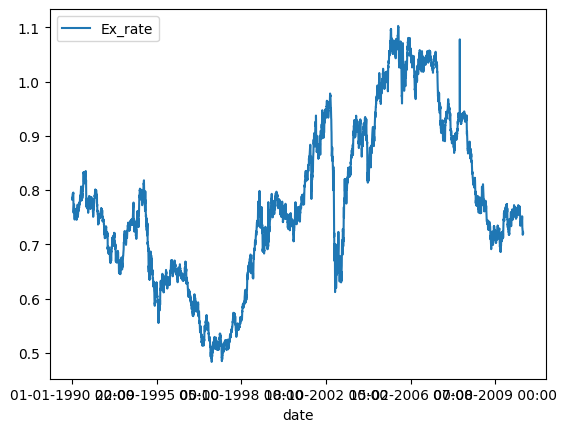

In [250]:
df.plot()

In [251]:
df.index = pd.to_datetime(df.index, format="%d-%m-%Y %H:%M")

df_monthly = df.resample('M').mean()


In [252]:
df_monthly

,Ex_rate
date,
1990-01-31,0.774600
1990-02-28,0.756600
1990-03-31,0.760500
1990-04-30,0.771063
1990-05-31,0.789856
...,...
2010-06-30,0.755952
2010-07-31,0.762200
2010-08-31,0.757520


<Axes: xlabel='date'>

<Figure size 1500x1000 with 0 Axes>

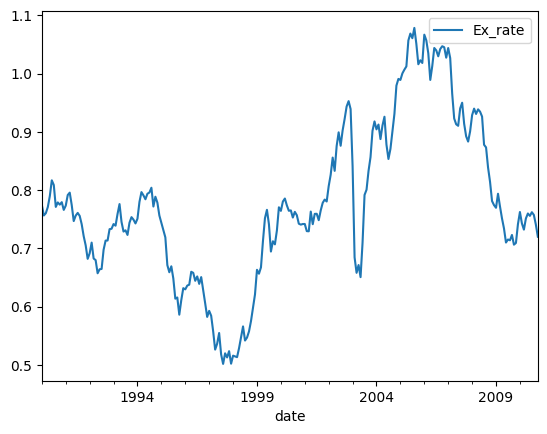

In [253]:
plt.figure(figsize=(15,10))
df_monthly.plot()

* The series shows cycles of rises and falls, not just a straight trend.
* Volatility spikes around major global events (late 1990s crisis, mid-2000s boom, 2008 crash).

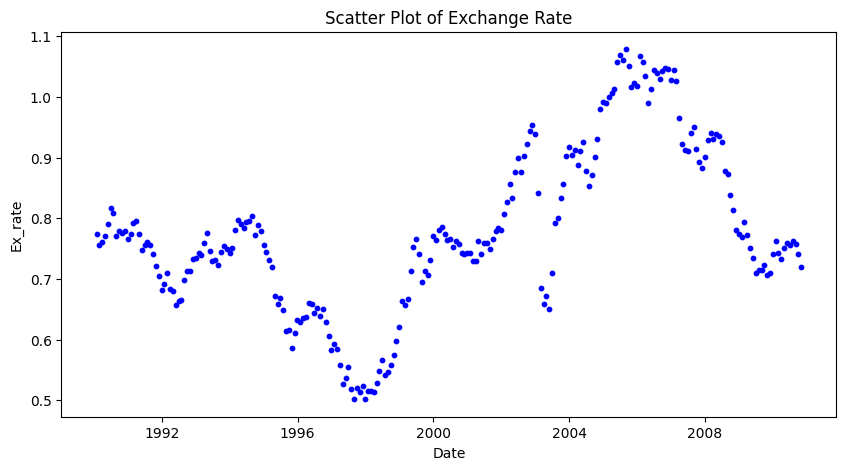

In [254]:
plt.figure(figsize=(10,5))
plt.scatter(df_monthly.index, df_monthly['Ex_rate'], s=10, c='blue')
plt.title("Scatter Plot of Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Ex_rate")
plt.show()

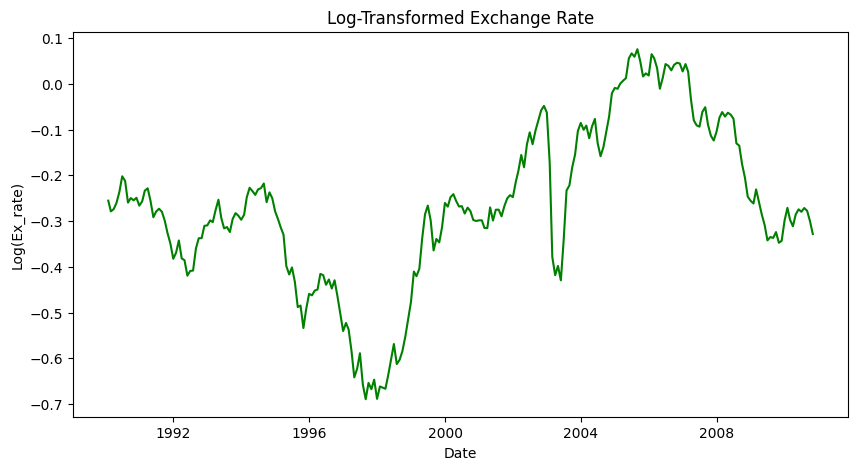

In [255]:
# Log Transformation Plot
plt.figure(figsize=(10,5))
plt.plot(df_monthly.index, np.log(df_monthly['Ex_rate']), color='green')
plt.title("Log-Transformed Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Log(Ex_rate)")
plt.show()

<Axes: ylabel='Frequency'>

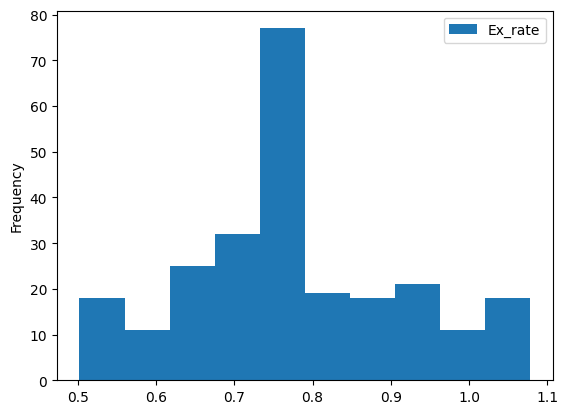

In [256]:
df_monthly.plot(kind='hist')

<Figure size 1000x500 with 0 Axes>

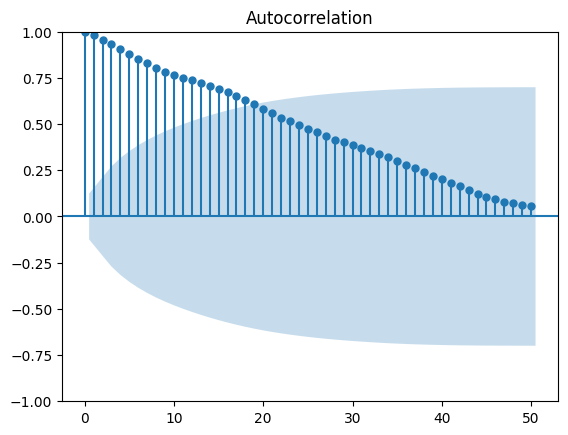

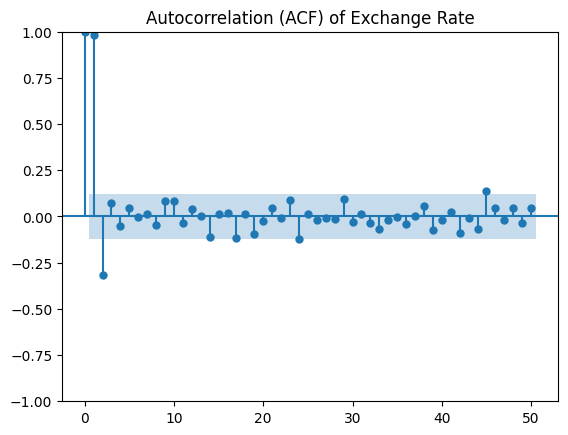

In [257]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
#  Autocorrelation Function (ACF)
plt.figure(figsize=(10,5))
plot_acf(df_monthly['Ex_rate'],lags=50)
plot_pacf(df_monthly['Ex_rate'],lags=50)
plt.title("Autocorrelation (ACF) of Exchange Rate")
plt.show()

In [258]:
df_monthly.shape

(250, 1)

### Partitioning data

In [259]:
train_df=df_monthly.head(200)
test_df=df_monthly.tail(50)

In [260]:
#Moving Average

<Figure size 2400x700 with 0 Axes>

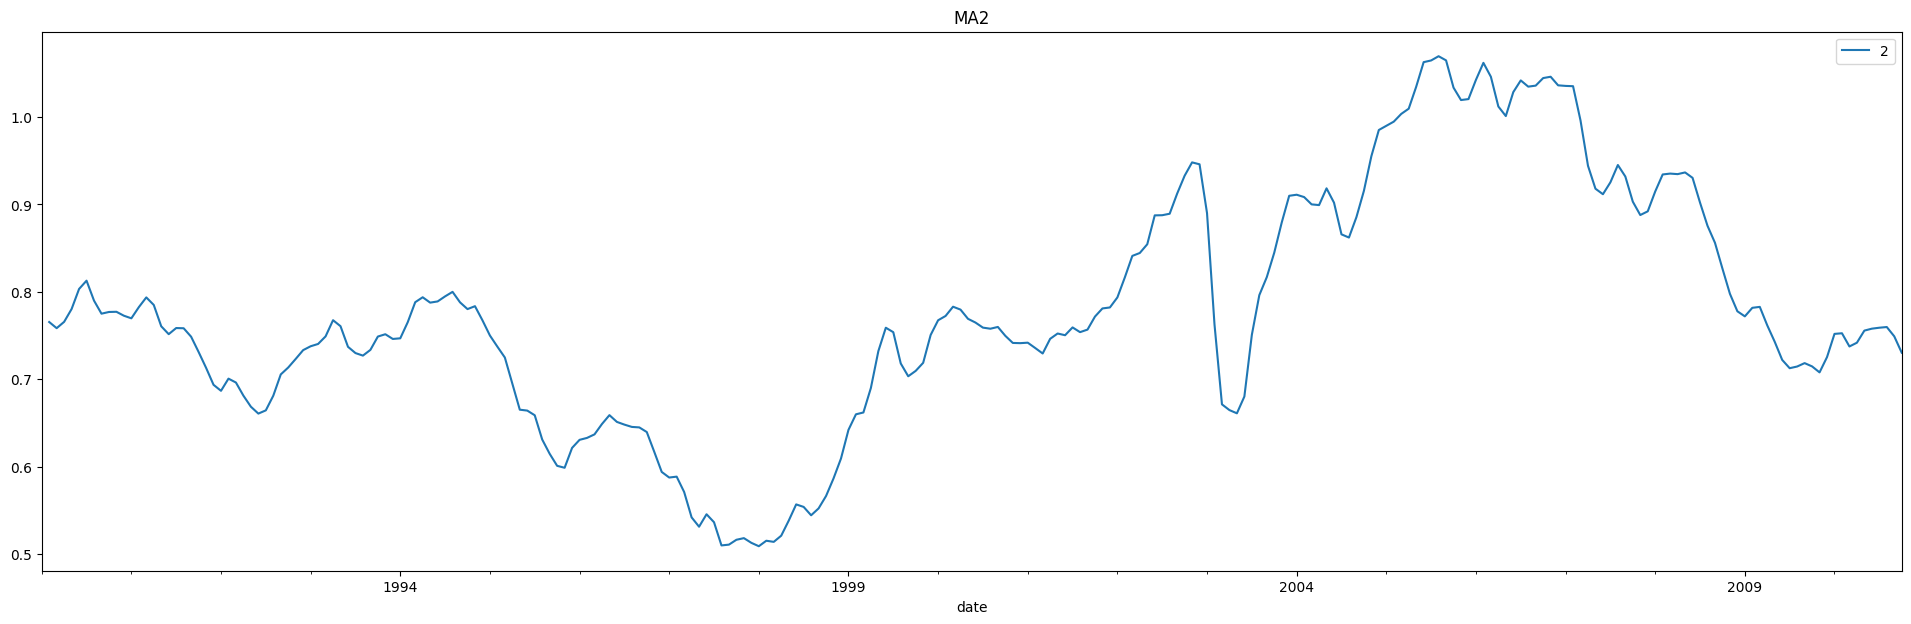

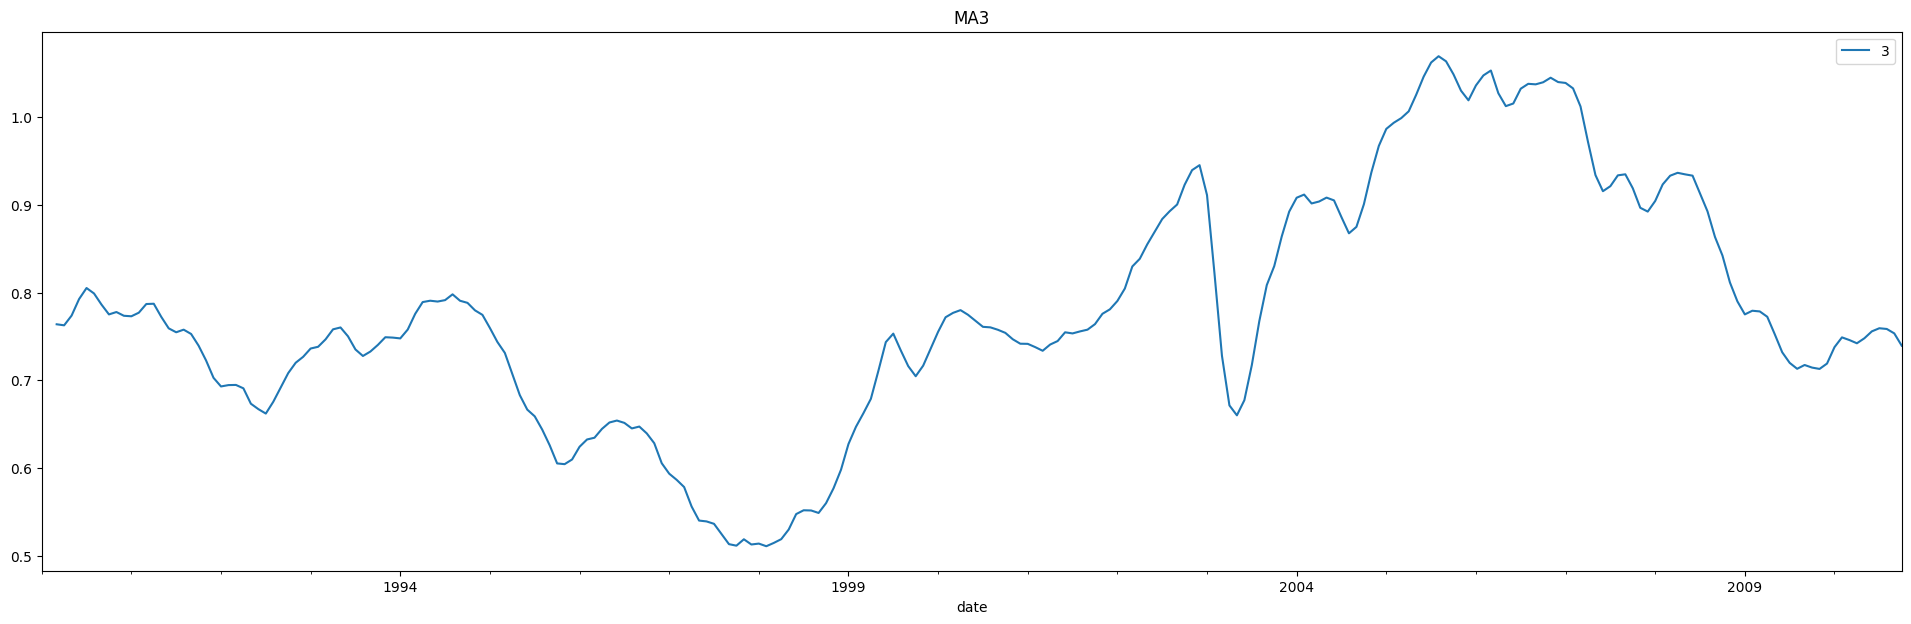

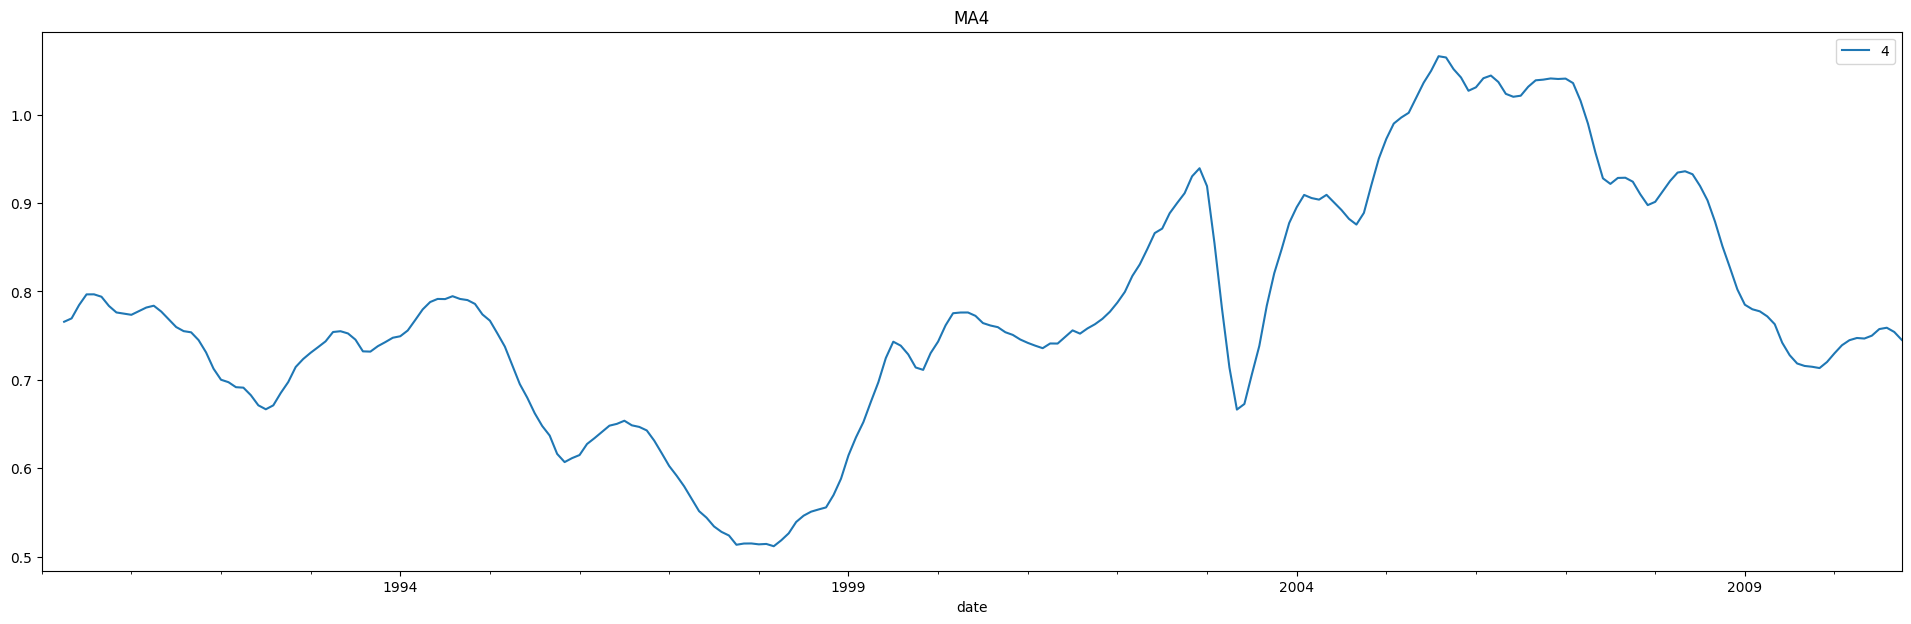

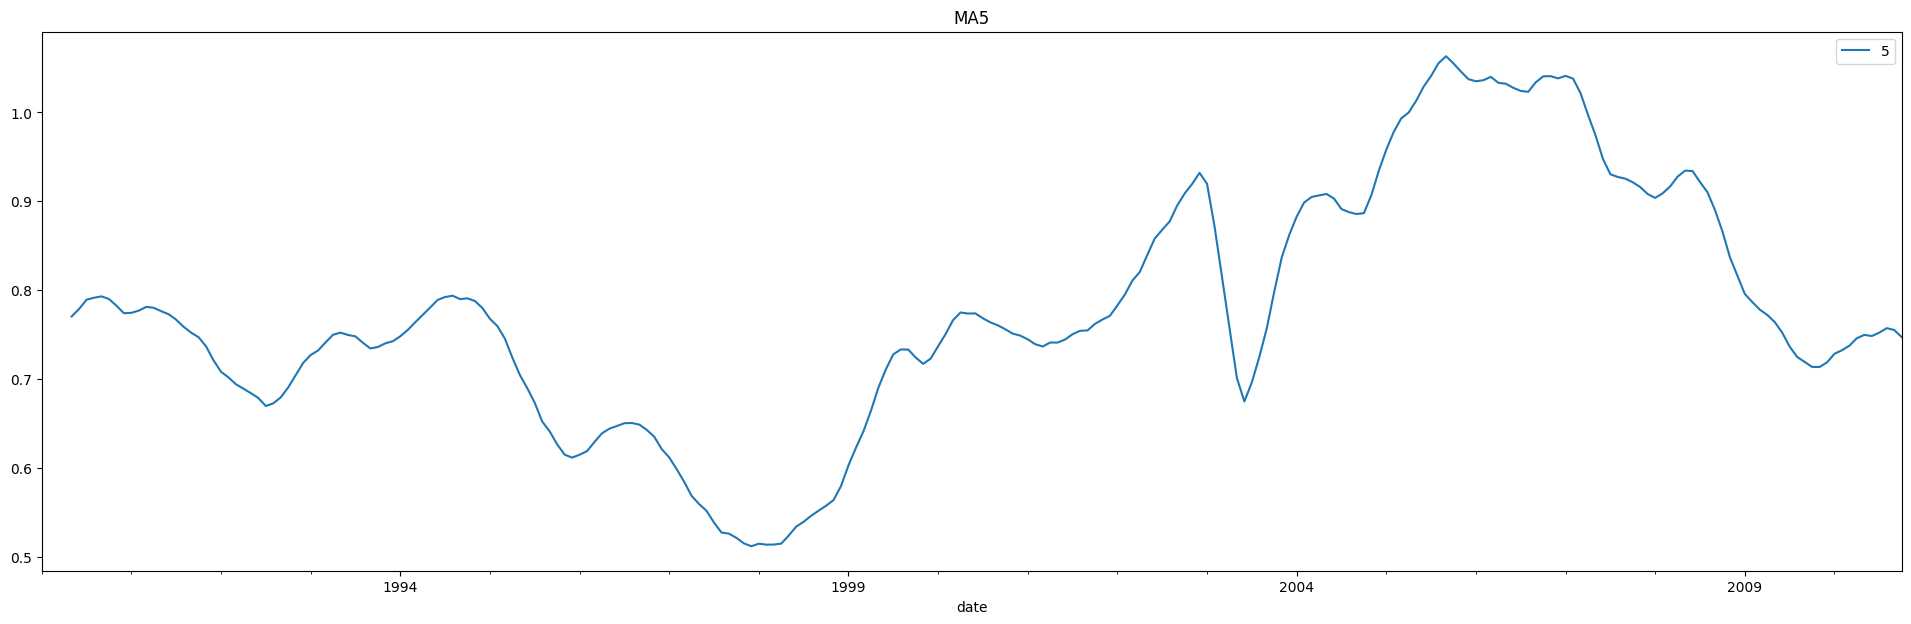

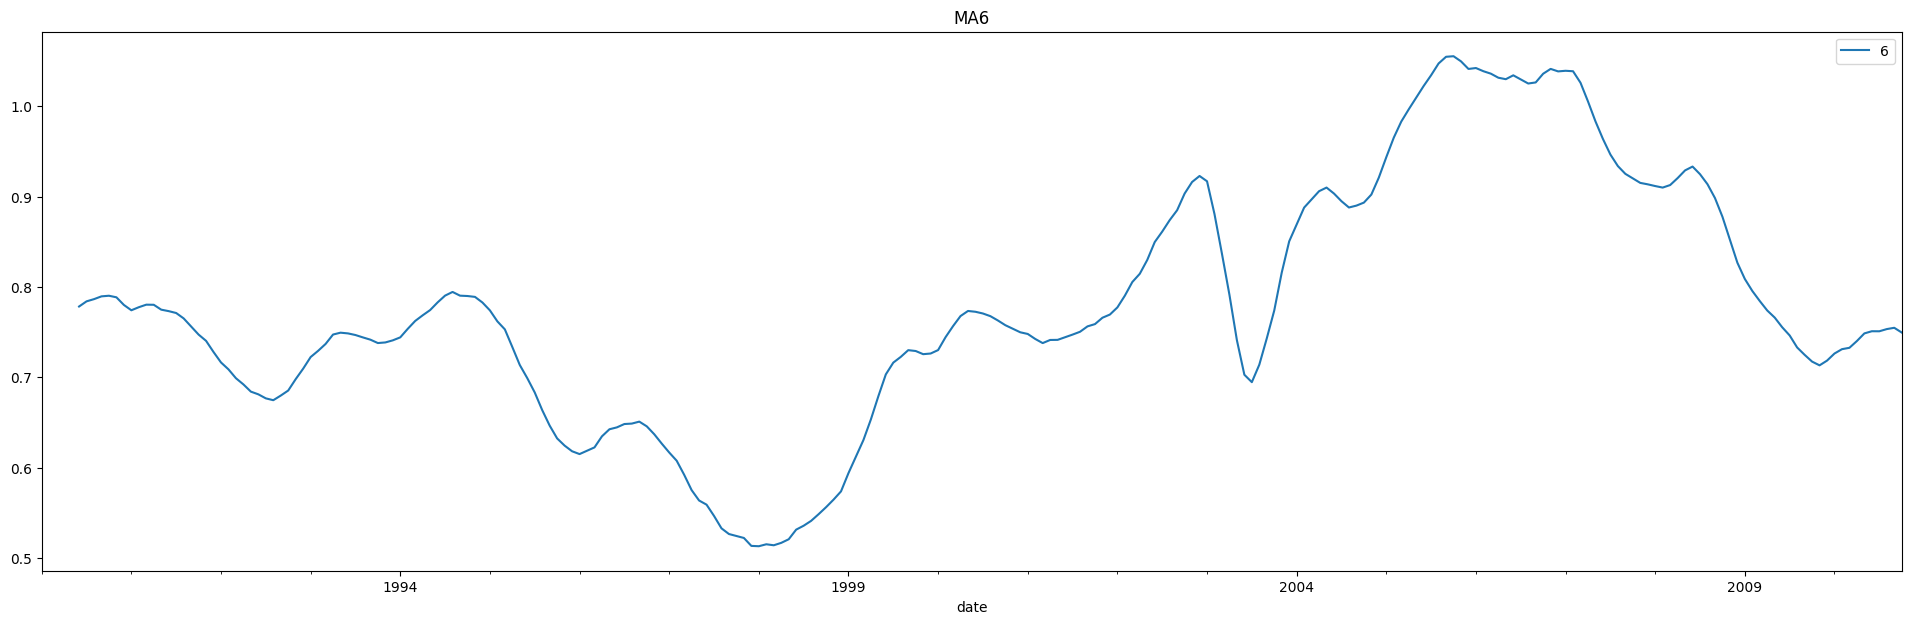

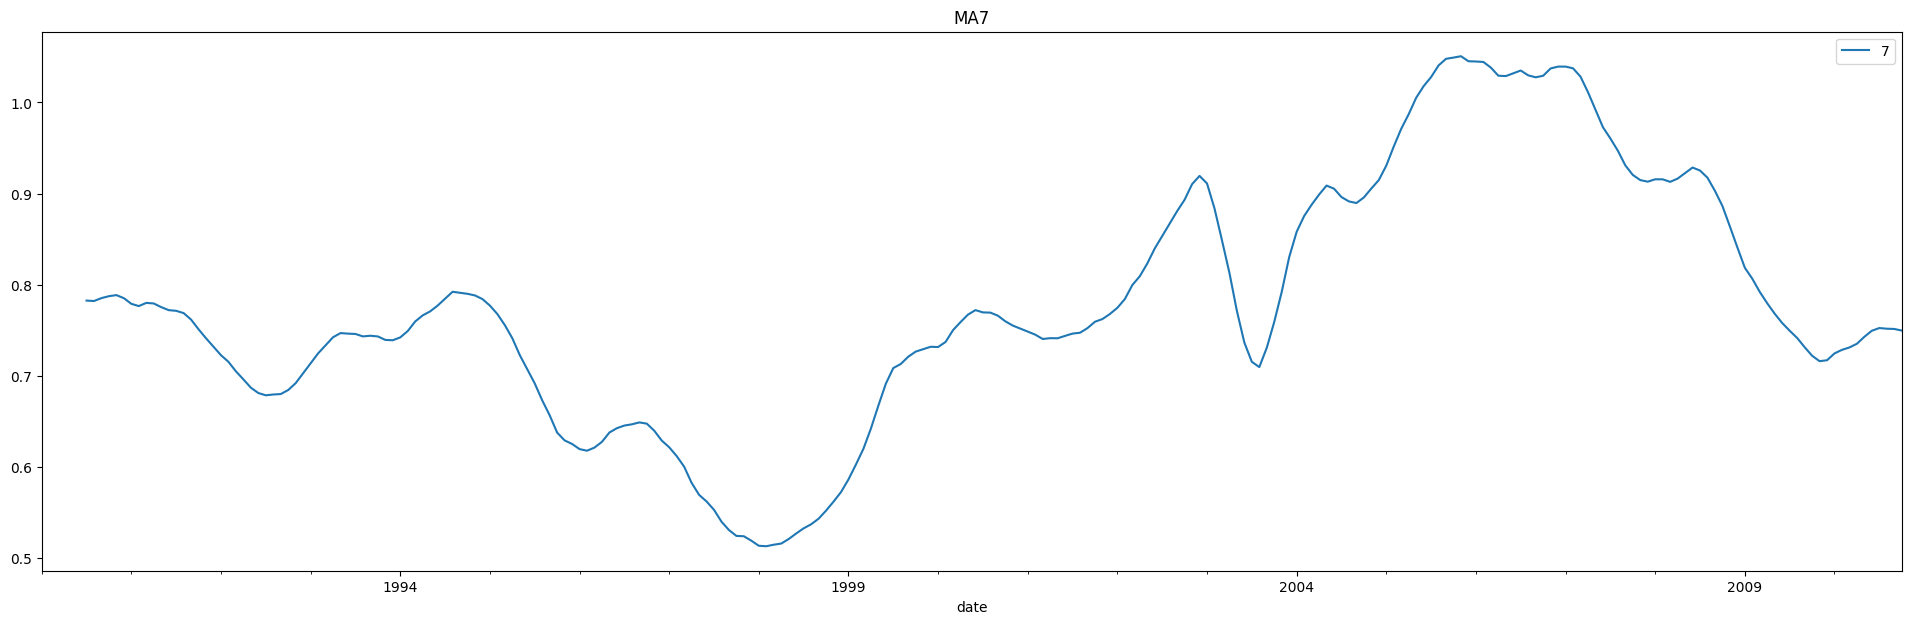

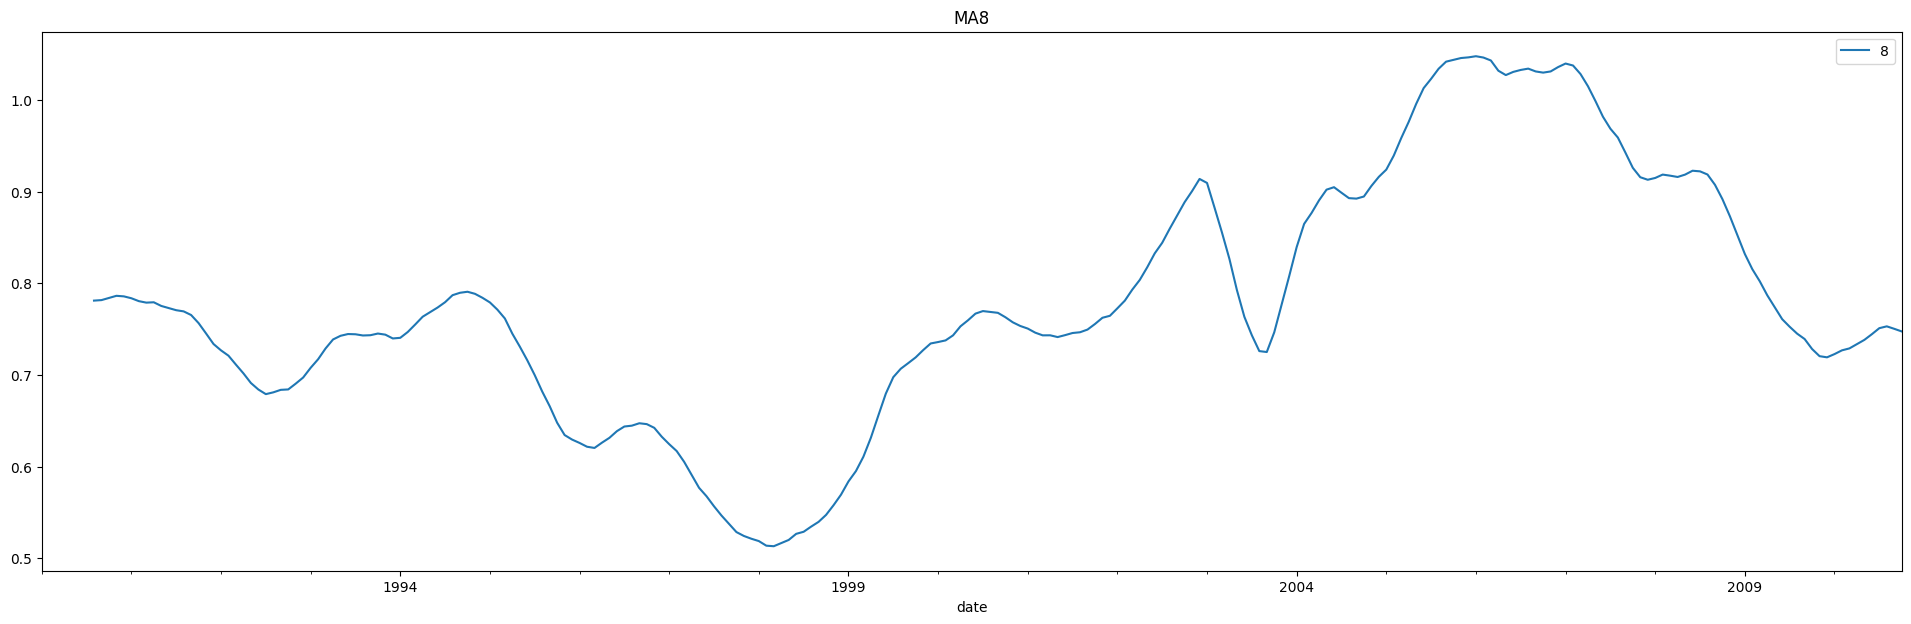

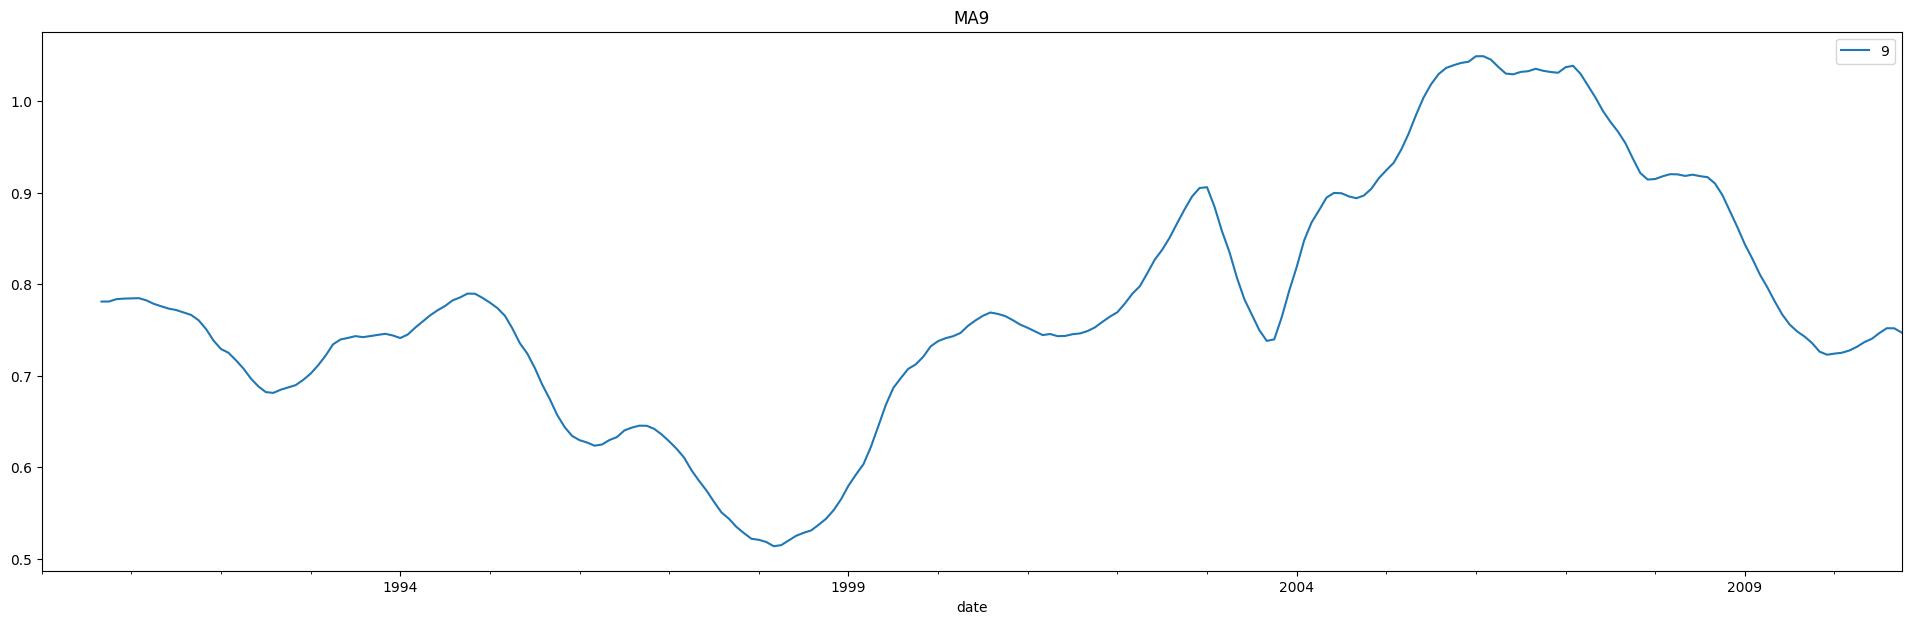

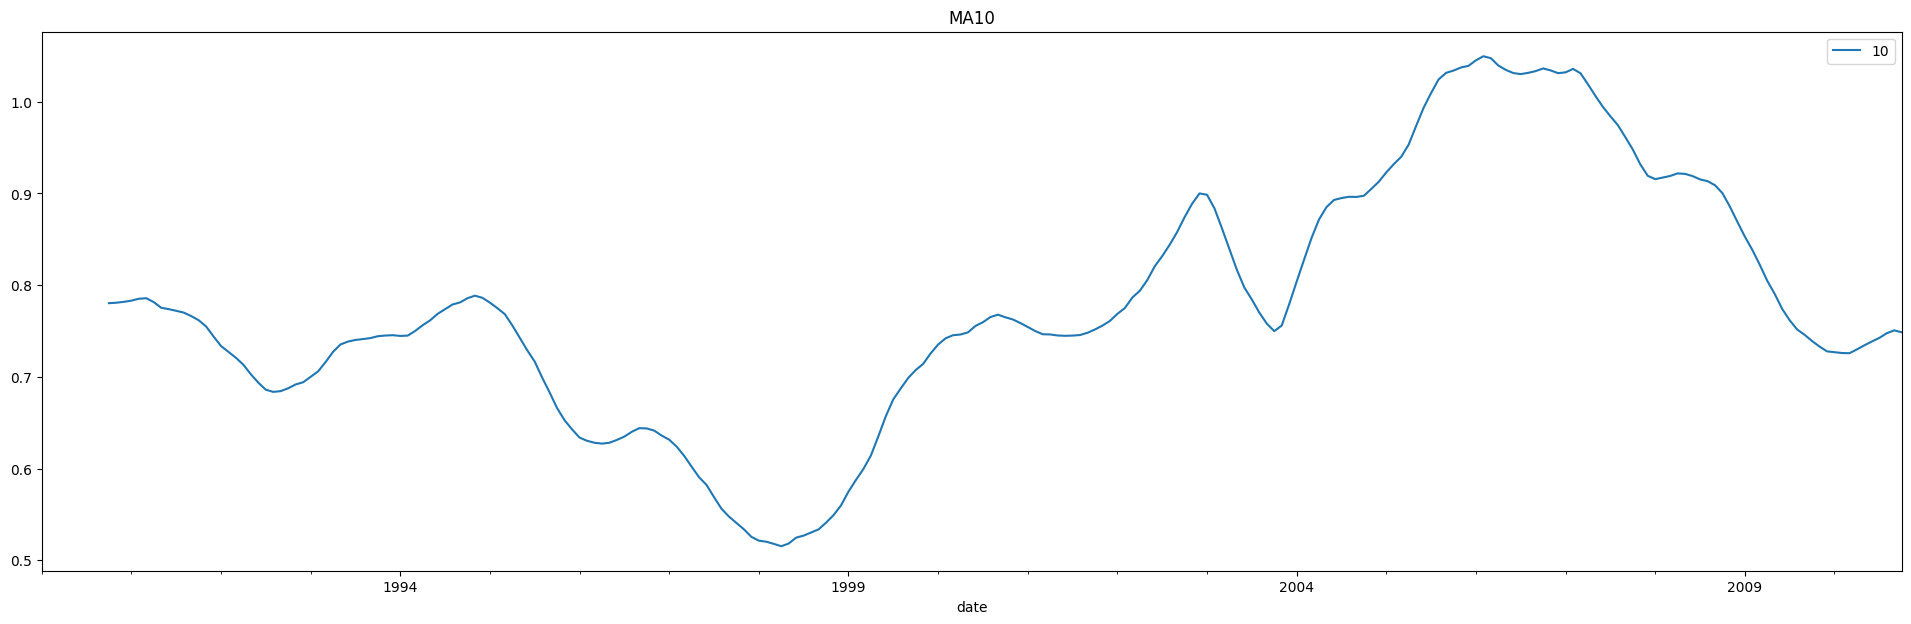

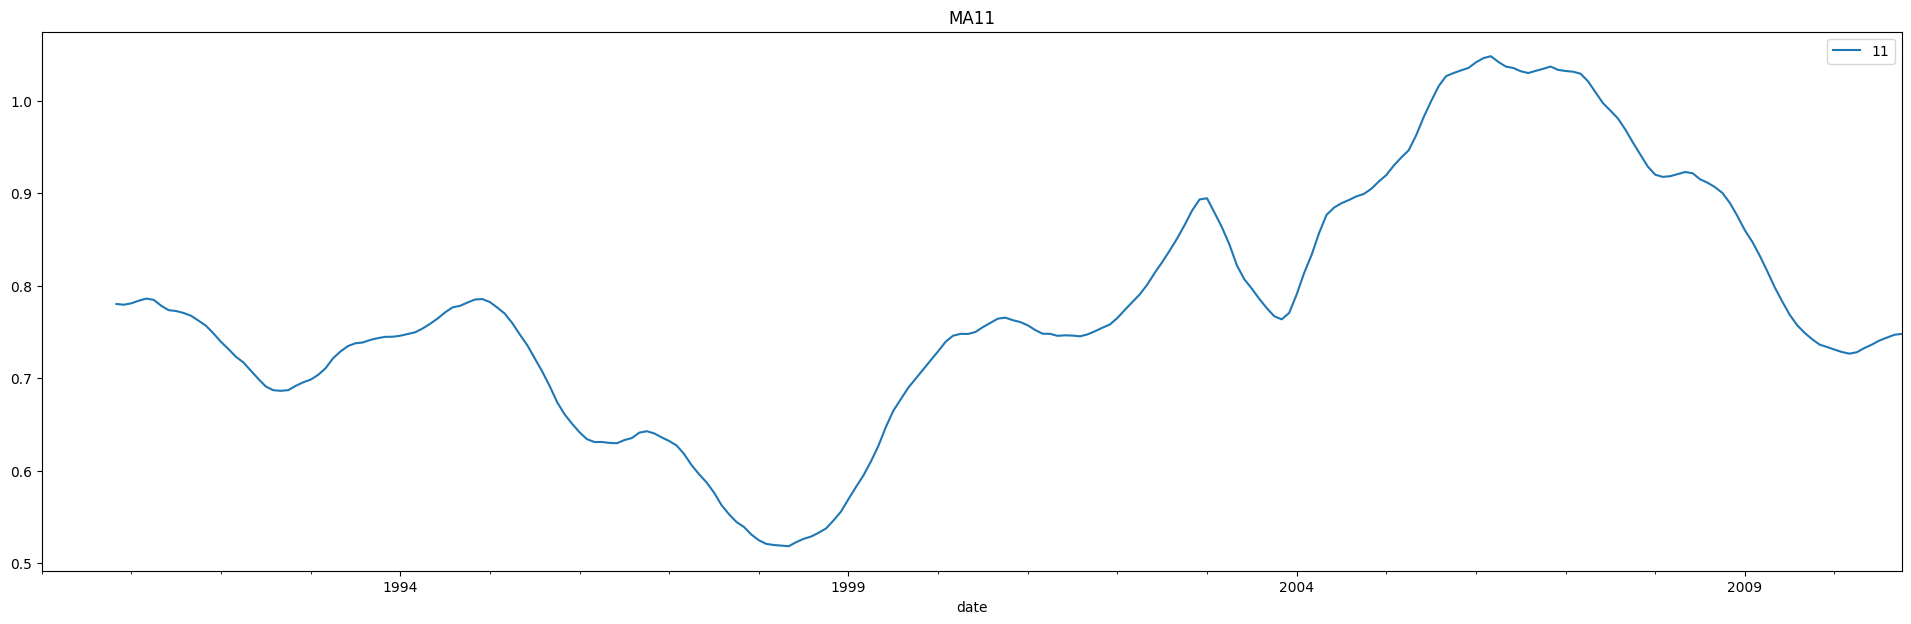

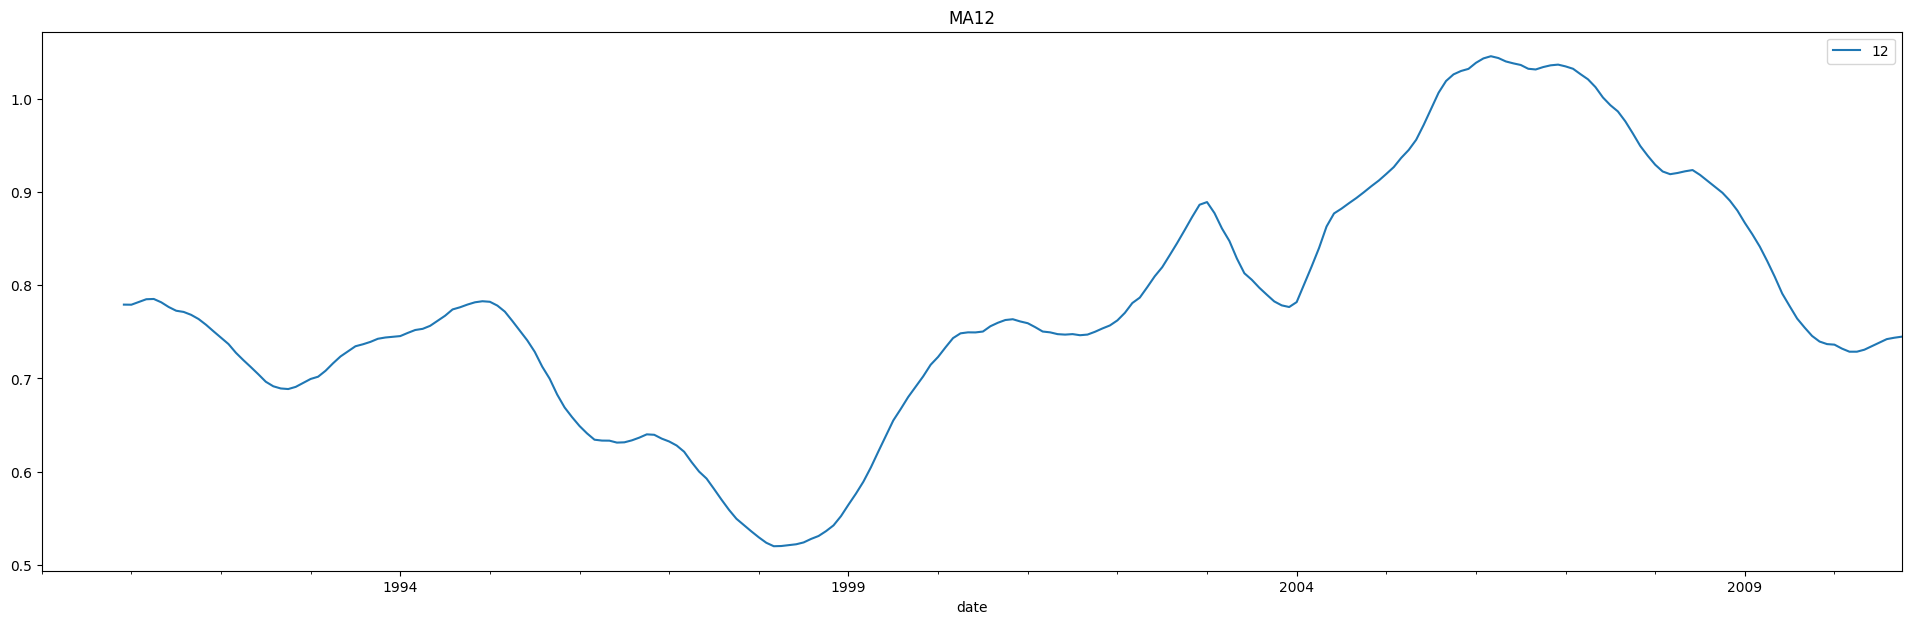

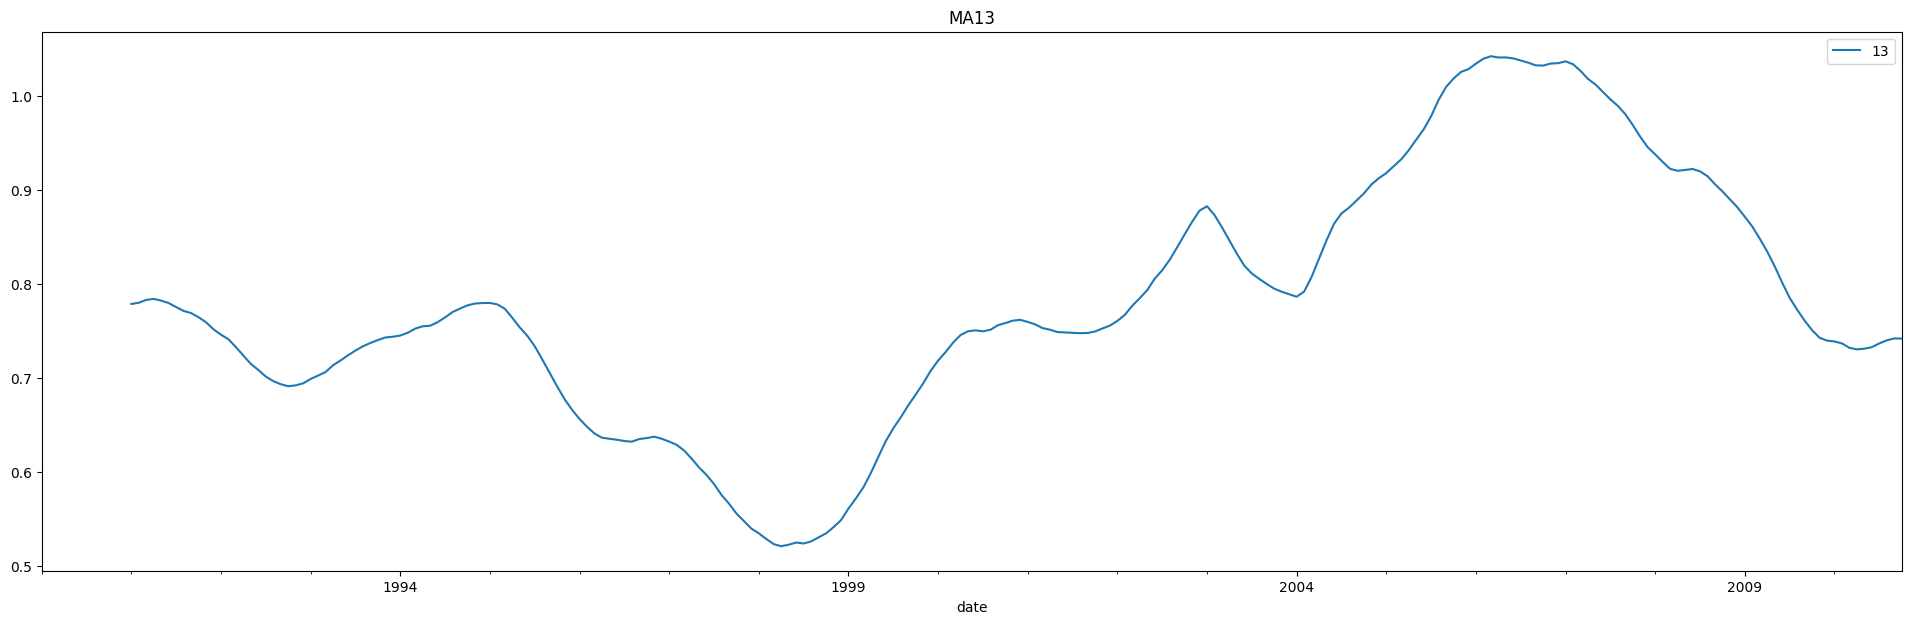

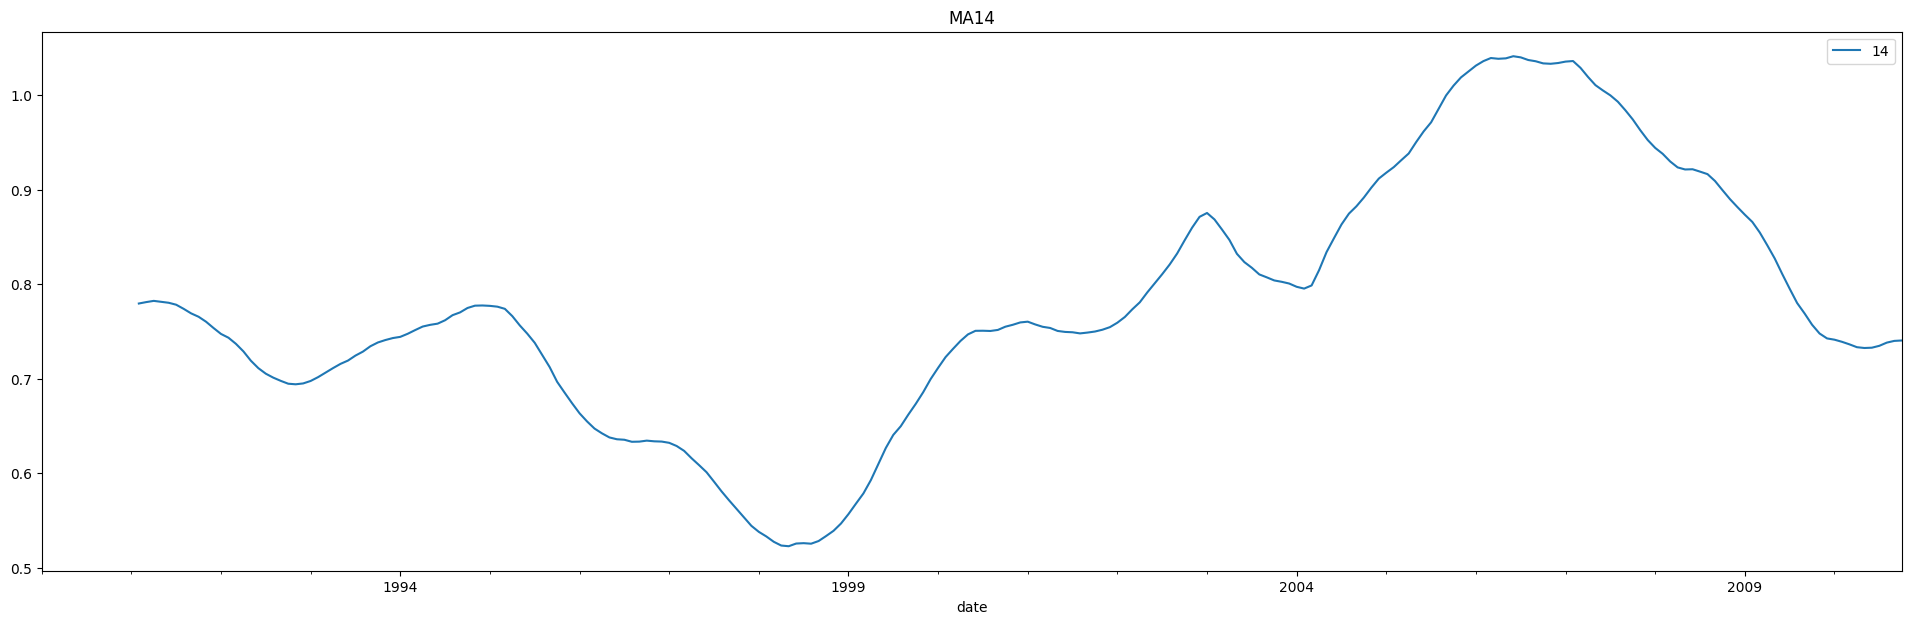

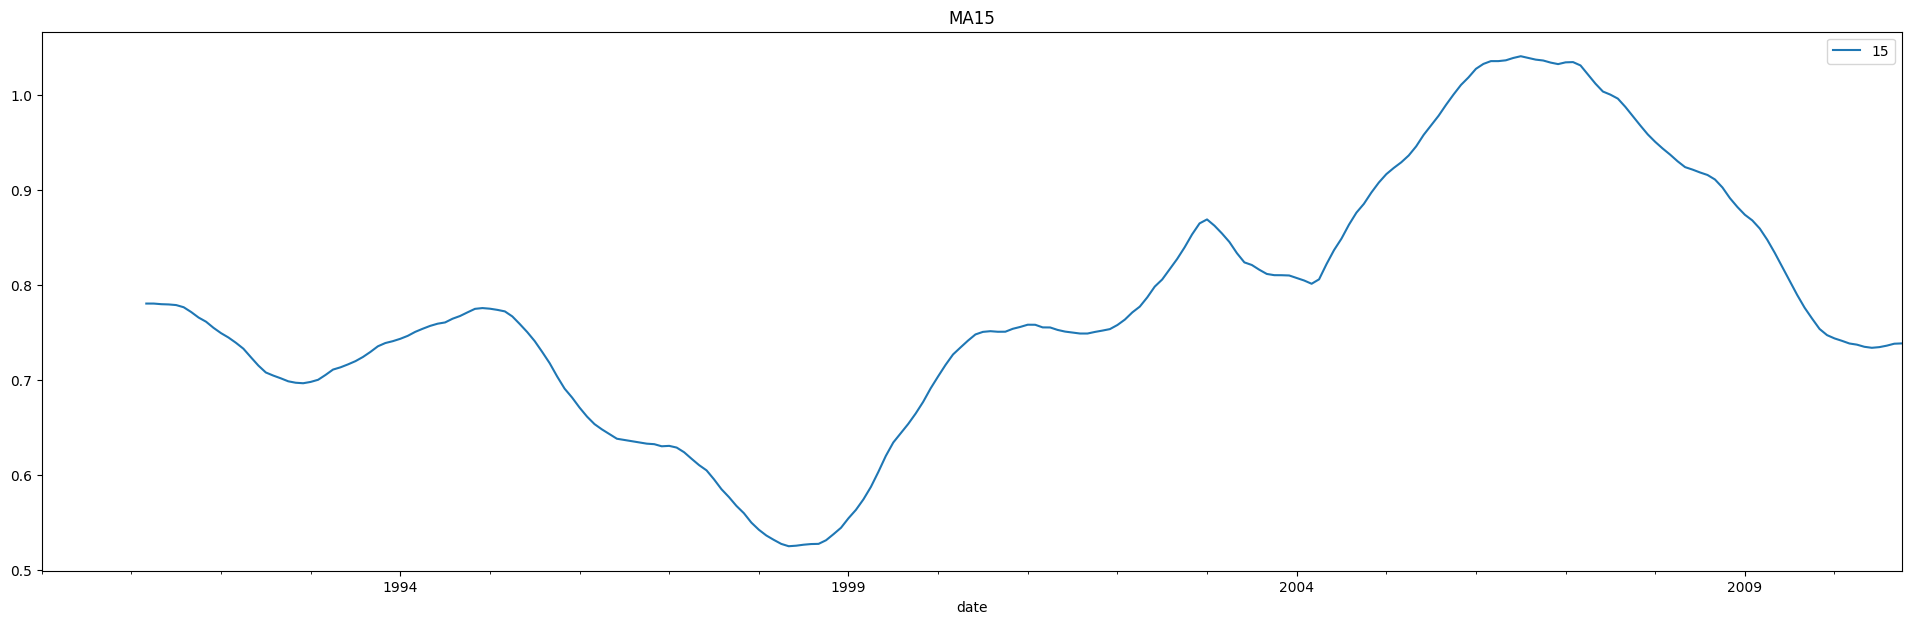

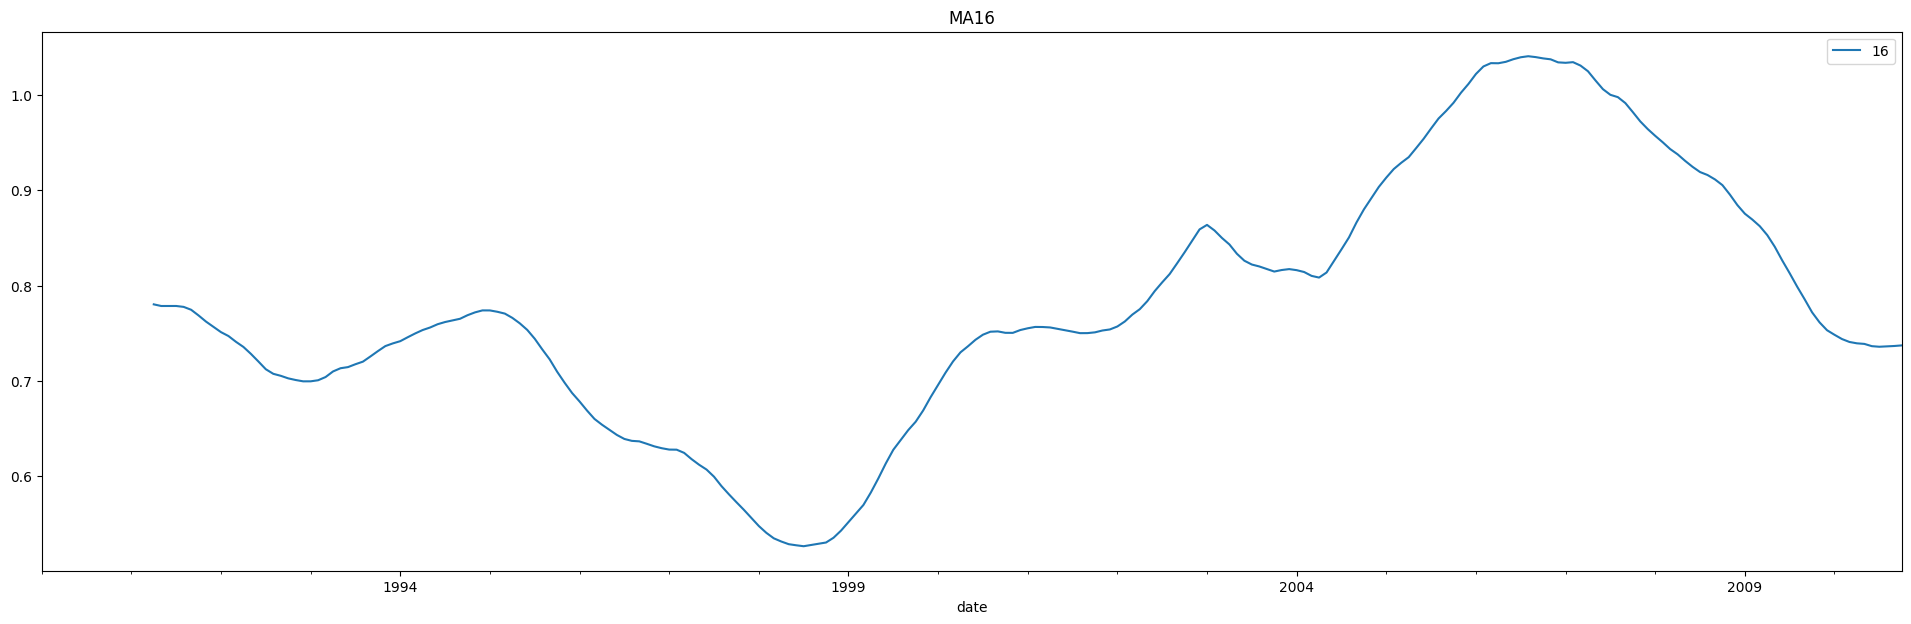

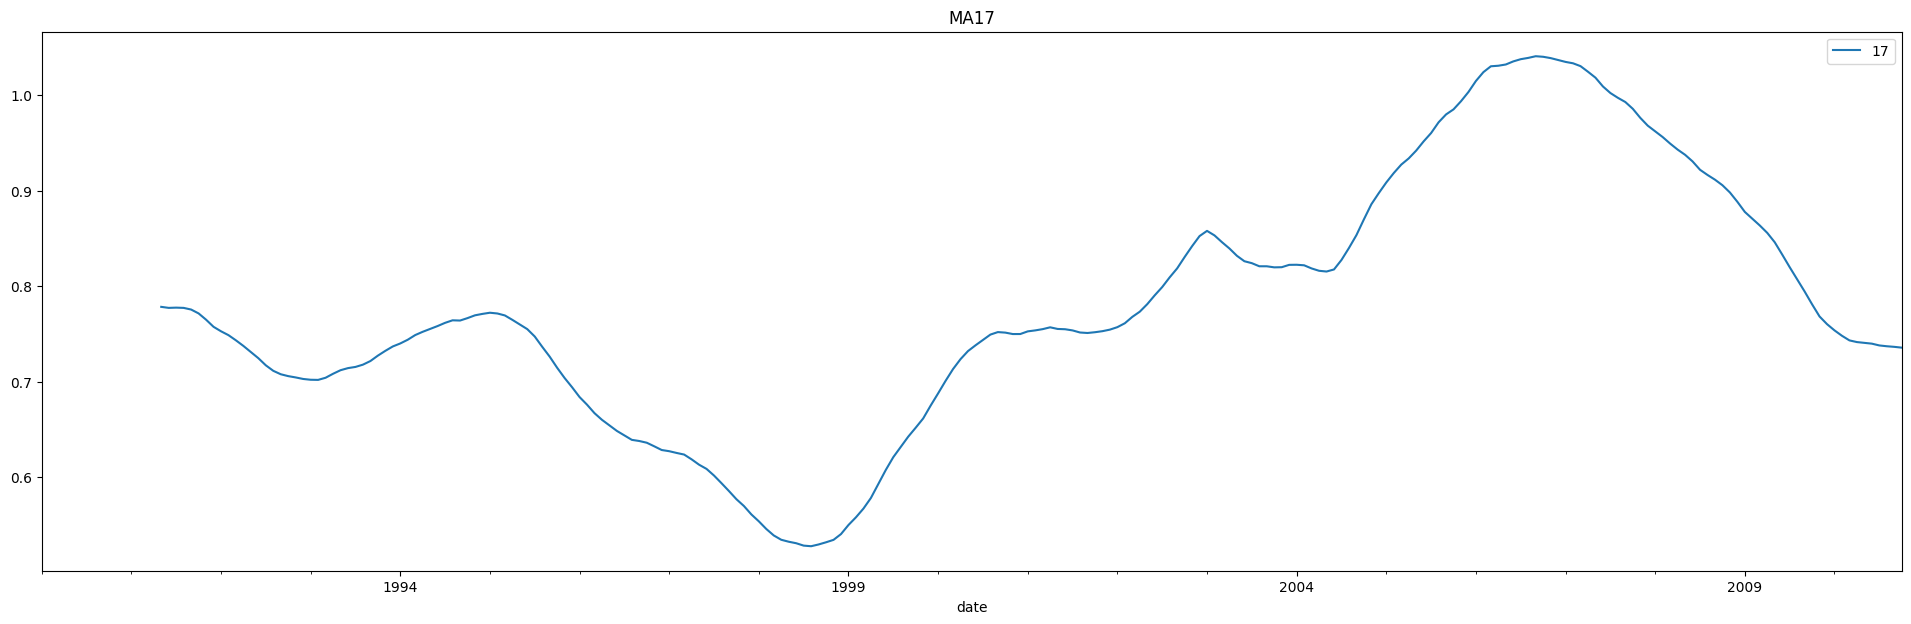

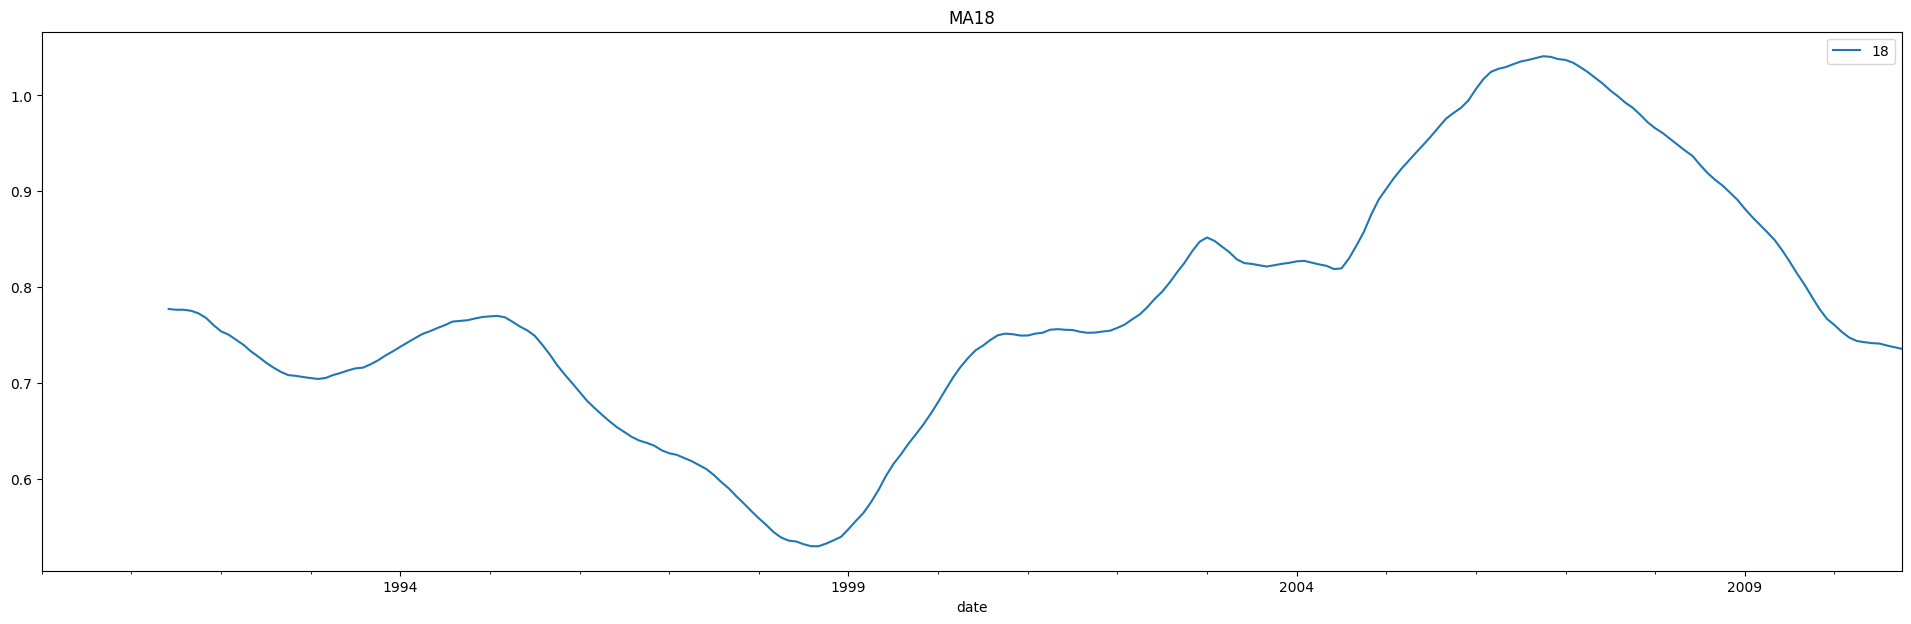

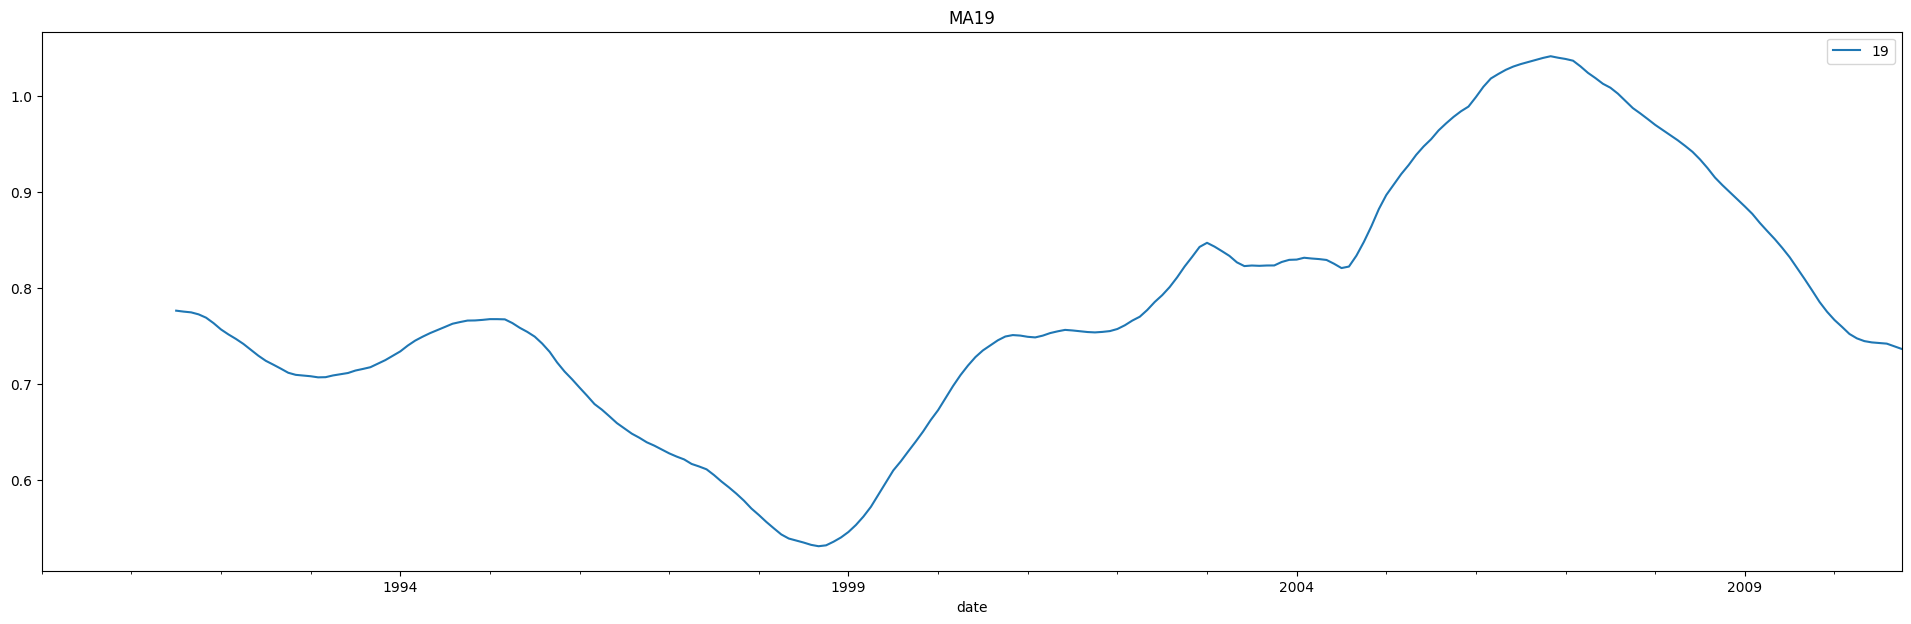

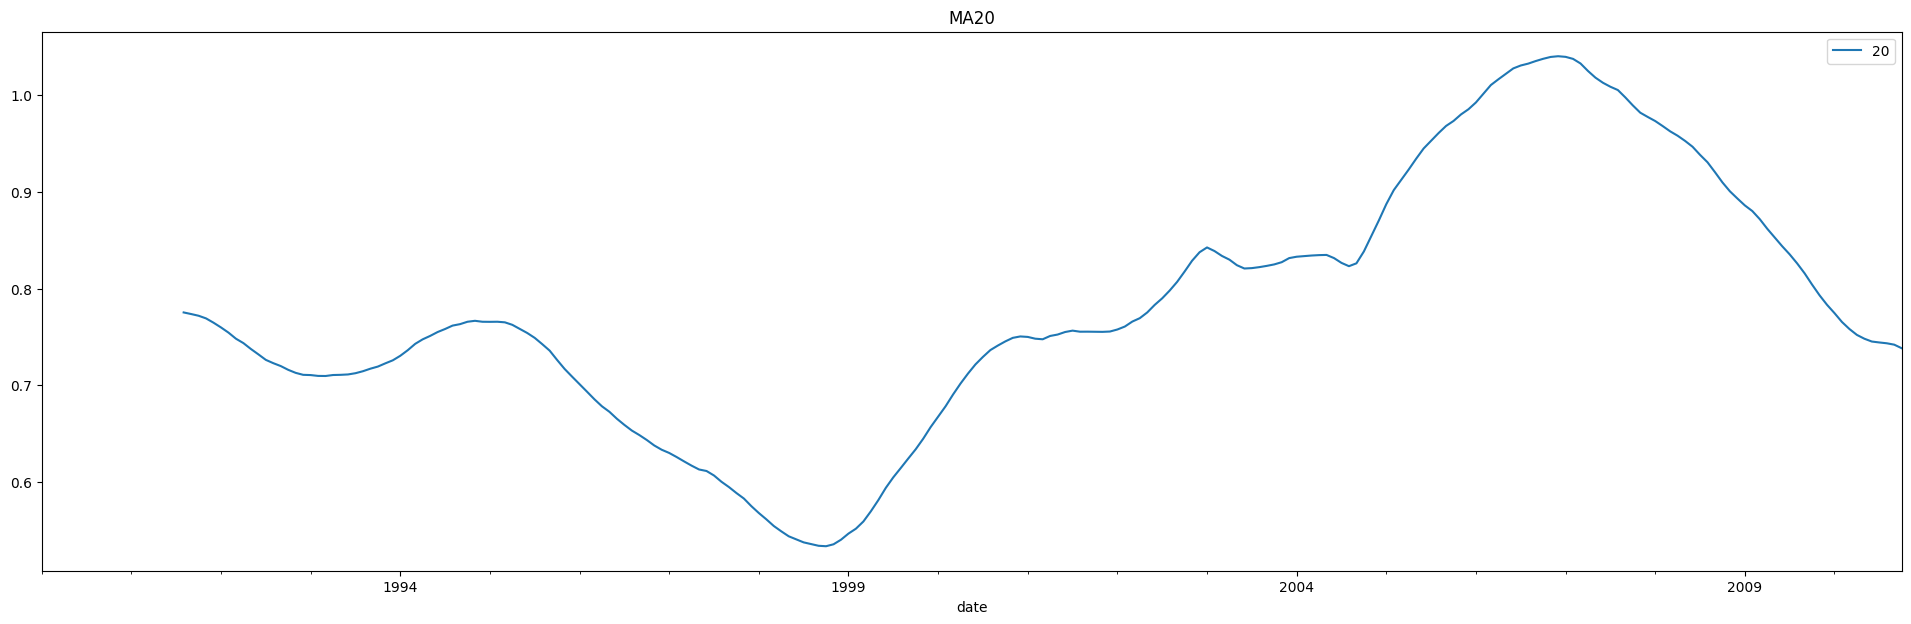

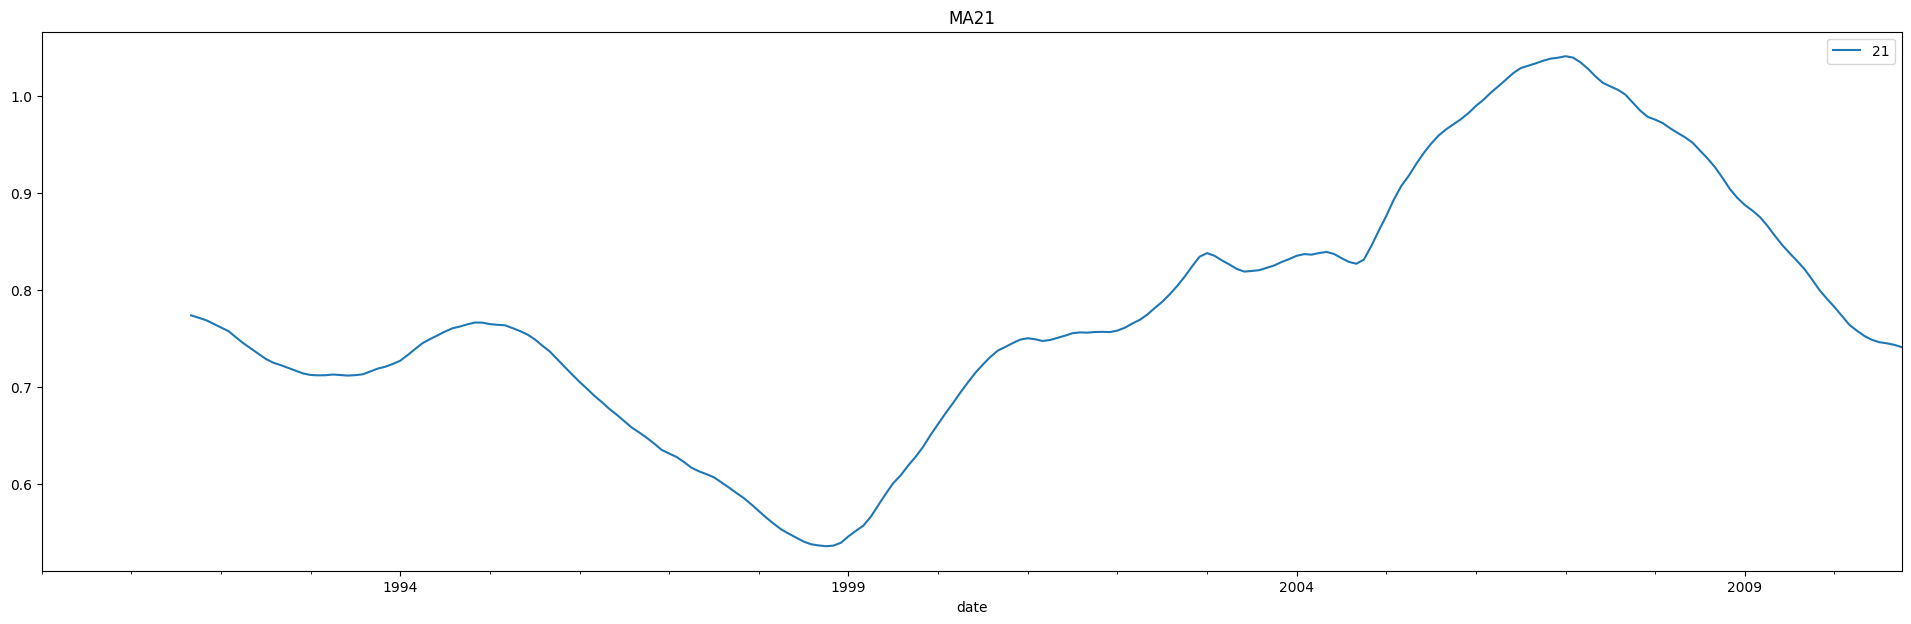

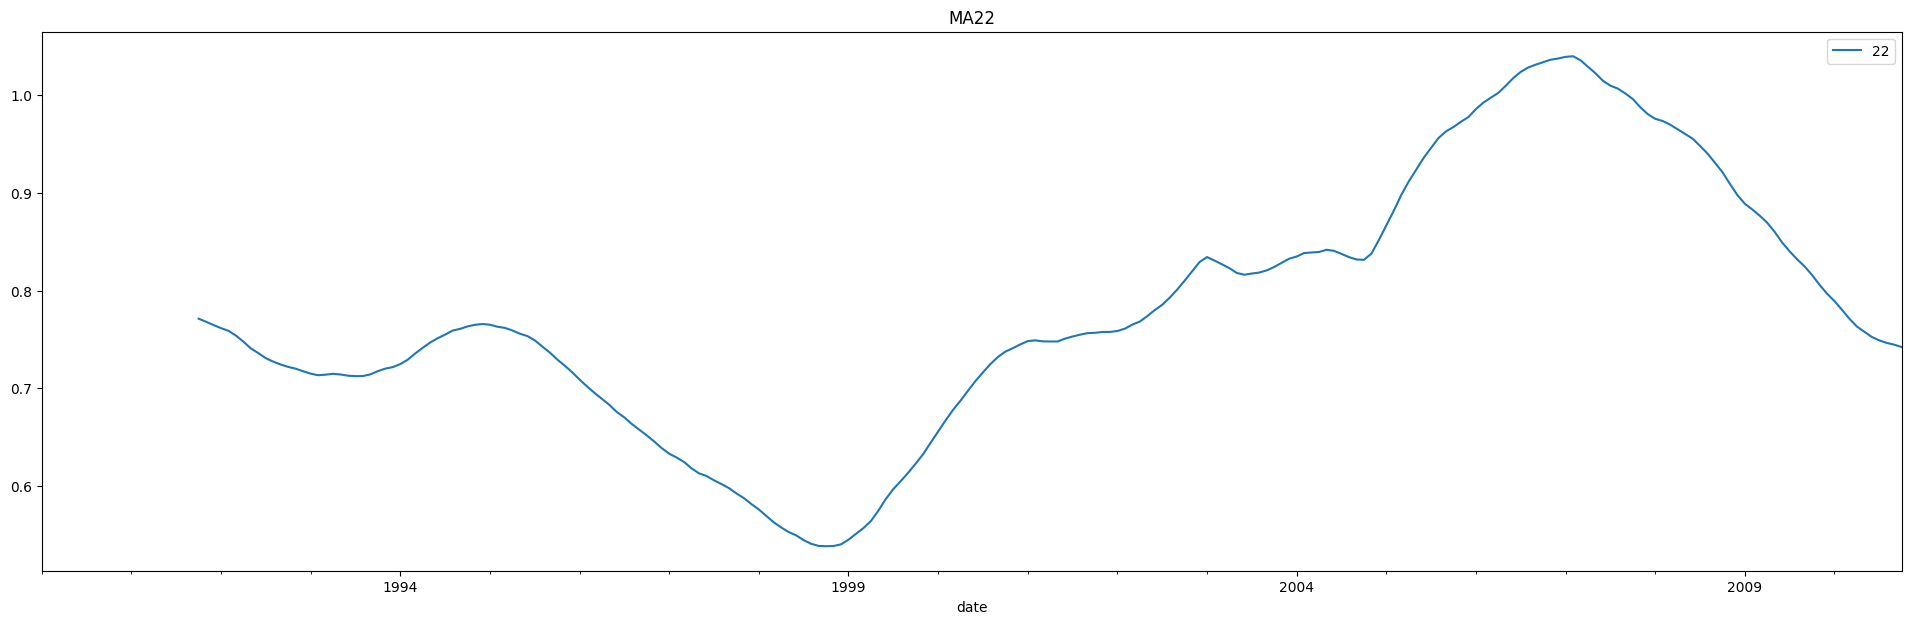

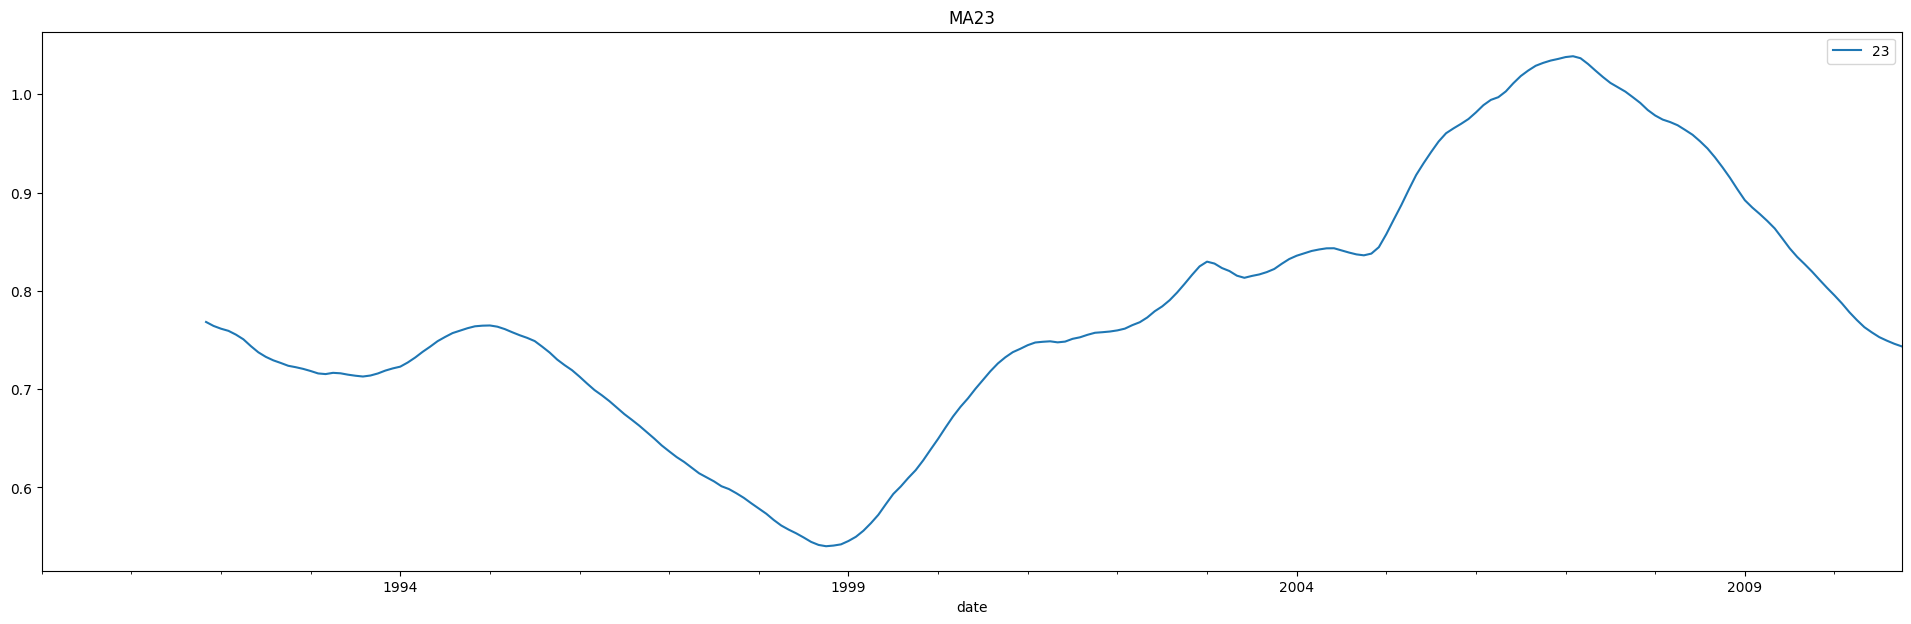

In [261]:
plt.figure(figsize=(24,7))
for i in range(2,24):
    plt.figure(figsize=(24,7))
    df_monthly['Ex_rate'].rolling(i).mean().plot(label=str(i))
    plt.title("MA"+str(i))
    plt.legend(loc='best')
    plt.show()

    

# ARIMA Model

In [262]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(train_df)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -1.2573119606747645
p-value: 0.6484689909487056


 Here the p value > 0.05 so we should apply differencing

In [263]:
train_df = train_df.diff().dropna()


In [264]:
result = adfuller(train_df)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -10.193410177240738
p-value: 6.236061891513985e-18


<Figure size 2400x2000 with 0 Axes>

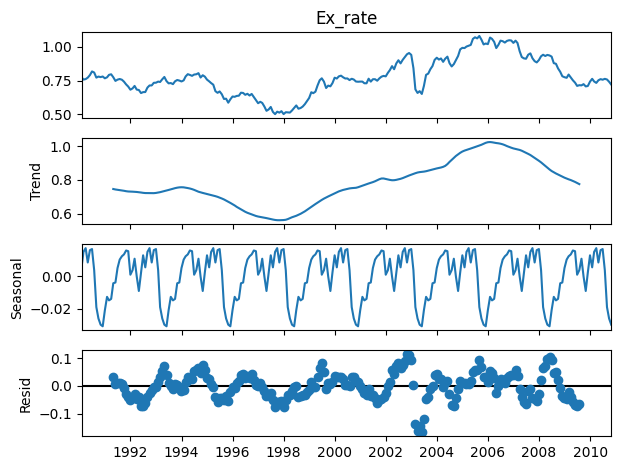

In [265]:
# Seasonal decompose
plt.figure(figsize=(24,20))
decompose=seasonal_decompose(df_monthly['Ex_rate'],period=30)
decompose.plot()
plt.show()

 **It has the both trend and the seasonality**

<Figure size 1000x500 with 0 Axes>

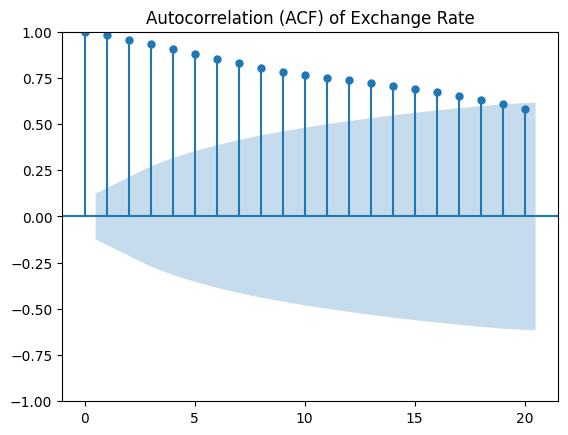

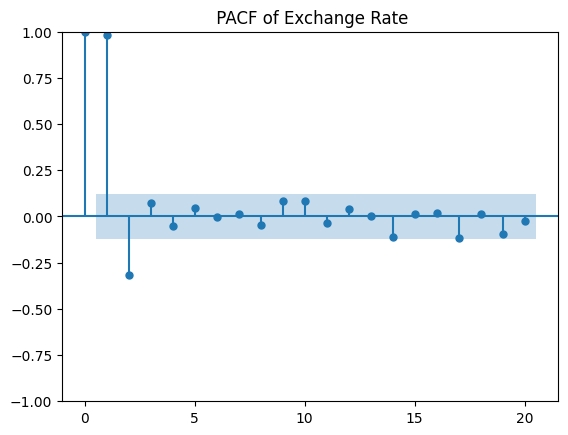

In [266]:
# ACF And PACF
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
#  Autocorrelation Function (ACF)
plt.figure(figsize=(10,5))
plot_acf(df_monthly['Ex_rate'],lags=20)
plt.title("Autocorrelation (ACF) of Exchange Rate")
plot_pacf(df_monthly['Ex_rate'],lags=20)
plt.title(" PACF of Exchange Rate")
plt.show()

In [267]:
!pip install statsmodels --upgrade

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Program Files\Python313\python.exe -m pip install --upgrade pip


In [268]:
from statsmodels.tsa.arima.model import ARIMA

def evaluate_arima_model(X,arima_order):
    X=X.astype('float32')
    train_size=int(len(X)*0.50)
    train,test=X[0:train_size],X[train_size:]
    history=[x for x in train]
    # make predixtions
    predictions=list()
    for t in range(len(test)):
        model=ARIMA(history,order=arima_order)
        model_fit=model.fit()
        yhat=model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # claculate out of sample error
    rmse=np.sqrt(mean_absolute_error(test,predictions))
    return rmse

In [269]:
def evaluate_model(dataset,p_value,d_value,q_value):
    dataset=dataset.astype('float32')
    best_score,best_cfg=float('inf'),None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order=(p,d,q)
                rmse=evaluate_arima_model(dataset,order)
                if rmse<best_score:
                    best_score,best_cfg=rmse,order
                print("ARIMA %s,RMSE=%.3f"%(order,rmse))
    print("Best ARIMA %s,RMSE=%.3f"%(best_cfg,best_score))

In [270]:
p_values=range(0,3)
d_values=range(0,3)
q_values=range(0,3)
evaluate_model(train_df['Ex_rate'],p_values,d_values,q_values)

ARIMA (0, 0, 0),RMSE=0.149
ARIMA (0, 0, 1),RMSE=0.147
ARIMA (0, 0, 2),RMSE=0.147
ARIMA (0, 1, 0),RMSE=0.162
ARIMA (0, 1, 1),RMSE=0.152
ARIMA (0, 1, 2),RMSE=0.148
ARIMA (0, 2, 0),RMSE=0.207
ARIMA (0, 2, 1),RMSE=0.163
ARIMA (0, 2, 2),RMSE=0.152
ARIMA (1, 0, 0),RMSE=0.149
ARIMA (1, 0, 1),RMSE=0.147
ARIMA (1, 0, 2),RMSE=0.147
ARIMA (1, 1, 0),RMSE=0.160
ARIMA (1, 1, 1),RMSE=0.150
ARIMA (1, 1, 2),RMSE=0.148
ARIMA (1, 2, 0),RMSE=0.186
ARIMA (1, 2, 1),RMSE=0.160
ARIMA (1, 2, 2),RMSE=0.161
ARIMA (2, 0, 0),RMSE=0.148
ARIMA (2, 0, 1),RMSE=0.148
ARIMA (2, 0, 2),RMSE=0.148
ARIMA (2, 1, 0),RMSE=0.156
ARIMA (2, 1, 1),RMSE=0.149
ARIMA (2, 1, 2),RMSE=0.149
ARIMA (2, 2, 0),RMSE=0.171
ARIMA (2, 2, 1),RMSE=0.156
ARIMA (2, 2, 2),RMSE=0.154
Best ARIMA (1, 0, 1),RMSE=0.147


In [271]:
# A few other models (like ARIMA(0,1,2), ARIMA(1,0,1), ARIMA(2,1,2)) also give very similar RMSE (~0.146–0.147).

In [293]:
# Example: ARIMA(p=0, d=1, q=1)
model = ARIMA(df_monthly, order=(1,0,1))
fitted_model = model.fit()
# Forecast for the length of the test set
steps = len(test_df)
arima_forecast = fitted_model.forecast(steps=steps)
arima_forecast

2010-11-30    0.715532
2010-12-31    0.717112
2011-01-31    0.718651
2011-02-28    0.720151
2011-03-31    0.721612
2011-04-30    0.723035
2011-05-31    0.724422
2011-06-30    0.725774
2011-07-31    0.727091
2011-08-31    0.728374
2011-09-30    0.729624
2011-10-31    0.730842
2011-11-30    0.732029
2011-12-31    0.733185
2012-01-31    0.734312
2012-02-29    0.735409
2012-03-31    0.736479
2012-04-30    0.737521
2012-05-31    0.738536
2012-06-30    0.739526
2012-07-31    0.740490
2012-08-31    0.741429
2012-09-30    0.742344
2012-10-31    0.743236
2012-11-30    0.744104
2012-12-31    0.744951
2013-01-31    0.745776
2013-02-28    0.746579
2013-03-31    0.747362
2013-04-30    0.748125
2013-05-31    0.748868
2013-06-30    0.749593
2013-07-31    0.750298
2013-08-31    0.750986
2013-09-30    0.751656
2013-10-31    0.752308
2013-11-30    0.752944
2013-12-31    0.753564
2014-01-31    0.754168
2014-02-28    0.754756
2014-03-31    0.755329
2014-04-30    0.755888
2014-05-31    0.756432
2014-06-30 

In [294]:
mape = mean_absolute_percentage_error(test_df['Ex_rate'], arima_forecast)
mae = mean_absolute_error(test_df['Ex_rate'], arima_forecast)
rmse=np.sqrt(mean_squared_error(test_df['Ex_rate'], arima_forecast))
print("MAPE:", mape)
print("MAE:", mae)
print("RMSE:", rmse)

MAPE: 0.12758854215492166
MAE: 0.11887803877033429
RMSE: 0.15946393024585828


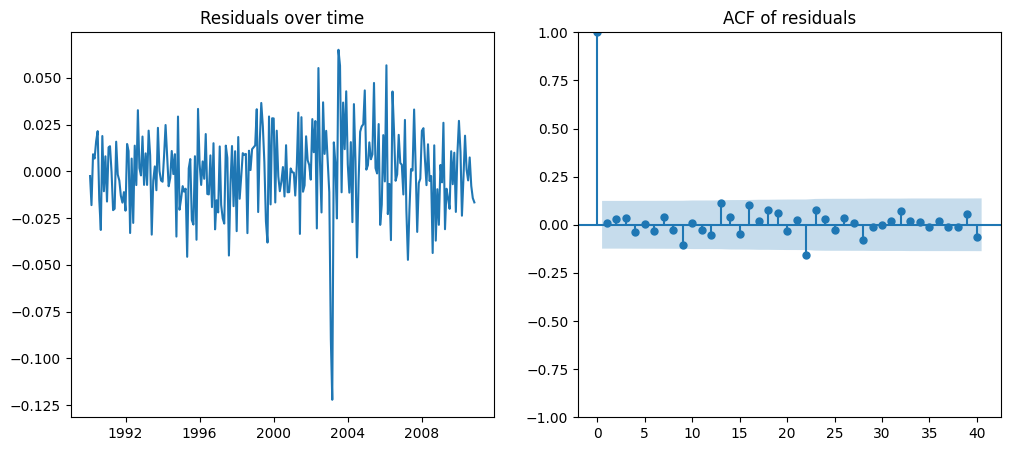

In [295]:
residuals = fitted_model.resid
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(residuals)
plt.title("Residuals over time")
plt.subplot(122)
plot_acf(residuals, lags=40, ax=plt.gca())
plt.title("ACF of residuals")
plt.show()

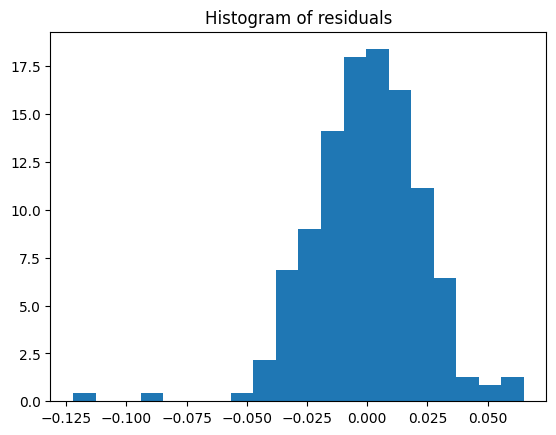

In [296]:
plt.figure()
plt.hist(residuals, bins=20, density=True)
plt.title("Histogram of residuals")
plt.show()

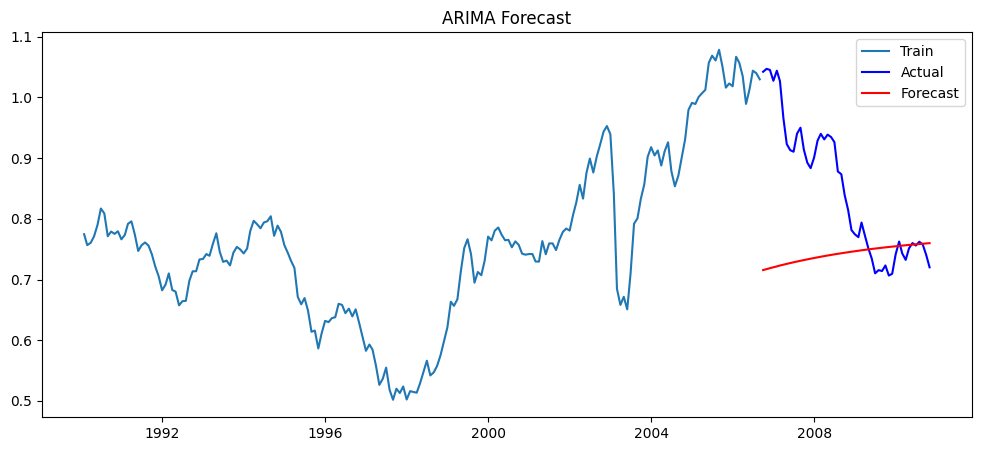

In [297]:
plt.figure(figsize=(12,5))
plt.plot(train_df['Ex_rate'], label='Train')
plt.plot(test_df.index, test_df['Ex_rate'], label='Actual', color='blue')
plt.plot(test_df.index,arima_forecast , label='Forecast', color='red')
plt.title("ARIMA Forecast")
plt.legend()
plt.show()

In [298]:
test_df['Ex_rate']

date
2006-09-30    1.042180
2006-10-31    1.046972
2006-11-30    1.045251
2006-12-31    1.027322
2007-01-31    1.043929
2007-02-28    1.026670
2007-03-31    0.965531
2007-04-30    0.923034
2007-05-31    0.913076
2007-06-30    0.910442
2007-07-31    0.940261
2007-08-31    0.950054
2007-09-30    0.913966
2007-10-31    0.892501
2007-11-30    0.883394
2007-12-31    0.900953
2008-01-31    0.928778
2008-02-29    0.939919
2008-03-31    0.930784
2008-04-30    0.938667
2008-05-31    0.934669
2008-06-30    0.926288
2008-07-31    0.877915
2008-08-31    0.873397
2008-09-30    0.838965
2008-10-31    0.814388
2008-11-30    0.781391
2008-12-31    0.774334
2009-01-31    0.769799
2009-02-28    0.793856
2009-03-31    0.771954
2009-04-30    0.751565
2009-05-31    0.734349
2009-06-30    0.710160
2009-07-31    0.715379
2009-08-31    0.714029
2009-09-30    0.723155
2009-10-31    0.706499
2009-11-30    0.709471
2009-12-31    0.741519
2010-01-31    0.762525
2010-02-28    0.742935
2010-03-31    0.732329
2010-0

In [299]:
arima_forecast

2010-11-30    0.715532
2010-12-31    0.717112
2011-01-31    0.718651
2011-02-28    0.720151
2011-03-31    0.721612
2011-04-30    0.723035
2011-05-31    0.724422
2011-06-30    0.725774
2011-07-31    0.727091
2011-08-31    0.728374
2011-09-30    0.729624
2011-10-31    0.730842
2011-11-30    0.732029
2011-12-31    0.733185
2012-01-31    0.734312
2012-02-29    0.735409
2012-03-31    0.736479
2012-04-30    0.737521
2012-05-31    0.738536
2012-06-30    0.739526
2012-07-31    0.740490
2012-08-31    0.741429
2012-09-30    0.742344
2012-10-31    0.743236
2012-11-30    0.744104
2012-12-31    0.744951
2013-01-31    0.745776
2013-02-28    0.746579
2013-03-31    0.747362
2013-04-30    0.748125
2013-05-31    0.748868
2013-06-30    0.749593
2013-07-31    0.750298
2013-08-31    0.750986
2013-09-30    0.751656
2013-10-31    0.752308
2013-11-30    0.752944
2013-12-31    0.753564
2014-01-31    0.754168
2014-02-28    0.754756
2014-03-31    0.755329
2014-04-30    0.755888
2014-05-31    0.756432
2014-06-30 

# Exponential Model

In [279]:
df.index = pd.to_datetime(df.index, format="%d-%m-%Y %H:%M")
df_monthly_1 = df.resample('M').mean()

In [280]:
train_df=df_monthly_1.head(200)
test_df=df_monthly_1.tail(50)

In [281]:
# Simple Exponetial Method
ses_model=SimpleExpSmoothing(train_df['Ex_rate']).fit(smoothing_level=0.2)
pred_ses=ses_model.predict(start=test_df.index[0],end=test_df.index[-1])
print(mean_absolute_percentage_error(pred_ses,test_df['Ex_rate']))
rmse=np.sqrt(np.mean((np.array(test_df['Ex_rate'])-np.array((pred_ses)))**2))
rmse

0.18123700374906412


np.float64(0.21423503801139582)

In [282]:
test_df['Ex_rate']

date
2006-09-30    1.042180
2006-10-31    1.046972
2006-11-30    1.045251
2006-12-31    1.027322
2007-01-31    1.043929
2007-02-28    1.026670
2007-03-31    0.965531
2007-04-30    0.923034
2007-05-31    0.913076
2007-06-30    0.910442
2007-07-31    0.940261
2007-08-31    0.950054
2007-09-30    0.913966
2007-10-31    0.892501
2007-11-30    0.883394
2007-12-31    0.900953
2008-01-31    0.928778
2008-02-29    0.939919
2008-03-31    0.930784
2008-04-30    0.938667
2008-05-31    0.934669
2008-06-30    0.926288
2008-07-31    0.877915
2008-08-31    0.873397
2008-09-30    0.838965
2008-10-31    0.814388
2008-11-30    0.781391
2008-12-31    0.774334
2009-01-31    0.769799
2009-02-28    0.793856
2009-03-31    0.771954
2009-04-30    0.751565
2009-05-31    0.734349
2009-06-30    0.710160
2009-07-31    0.715379
2009-08-31    0.714029
2009-09-30    0.723155
2009-10-31    0.706499
2009-11-30    0.709471
2009-12-31    0.741519
2010-01-31    0.762525
2010-02-28    0.742935
2010-03-31    0.732329
2010-0

In [283]:
pred_ses

2006-09-30    1.030906
2006-10-31    1.030906
2006-11-30    1.030906
2006-12-31    1.030906
2007-01-31    1.030906
2007-02-28    1.030906
2007-03-31    1.030906
2007-04-30    1.030906
2007-05-31    1.030906
2007-06-30    1.030906
2007-07-31    1.030906
2007-08-31    1.030906
2007-09-30    1.030906
2007-10-31    1.030906
2007-11-30    1.030906
2007-12-31    1.030906
2008-01-31    1.030906
2008-02-29    1.030906
2008-03-31    1.030906
2008-04-30    1.030906
2008-05-31    1.030906
2008-06-30    1.030906
2008-07-31    1.030906
2008-08-31    1.030906
2008-09-30    1.030906
2008-10-31    1.030906
2008-11-30    1.030906
2008-12-31    1.030906
2009-01-31    1.030906
2009-02-28    1.030906
2009-03-31    1.030906
2009-04-30    1.030906
2009-05-31    1.030906
2009-06-30    1.030906
2009-07-31    1.030906
2009-08-31    1.030906
2009-09-30    1.030906
2009-10-31    1.030906
2009-11-30    1.030906
2009-12-31    1.030906
2010-01-31    1.030906
2010-02-28    1.030906
2010-03-31    1.030906
2010-04-30 

In [284]:
# Holt Exponetial Method
hw_model=Holt(train_df['Ex_rate']).fit(smoothing_slope=0.2,smoothing_level=0.8)
pred_hw=hw_model.predict(start=test_df.index[0],end=test_df.index[-1])
print(mean_absolute_percentage_error(pred_hw,test_df['Ex_rate']))
rmse=np.sqrt(np.mean((np.array(test_df['Ex_rate'])-np.array((pred_hw)))**2))
rmse

0.18659021287105998


np.float64(0.22246361011233476)

In [285]:
# Holt winters Exponetial Method
hw_model_mul_add=ExponentialSmoothing(train_df['Ex_rate'],seasonal='mul',trend='add',seasonal_periods=12).fit()
pred_hw_mul_add=hw_model_mul_add.predict(start=test_df.index[0],end=test_df.index[-1])
print("mean_absolute_percentage_error",mean_absolute_percentage_error(pred_hw_mul_add,test_df['Ex_rate']))
print("mean_absolute_error",mean_absolute_error(pred_hw_mul_add,test_df['Ex_rate']))
rmse=np.sqrt(np.mean((np.array(test_df['Ex_rate'])-np.array((pred_hw_mul_add)))**2))
rmse

mean_absolute_percentage_error 0.2085344914512689
mean_absolute_error 0.22543334628292036


np.float64(0.25804347383422144)

In [286]:
# Holt winters Exponetial Method
hw_model_add_mul=ExponentialSmoothing(train_df['Ex_rate'],seasonal='add',trend='mul',seasonal_periods=12).fit()
pred_hw_add_mul=hw_model_add_mul.predict(start=test_df.index[0],end=test_df.index[-1])
print("mean_absolute_percentage_error",mean_absolute_percentage_error(pred_hw_add_mul,test_df['Ex_rate']))
print("mean_absolute_error",mean_absolute_error(pred_hw_add_mul,test_df['Ex_rate']))
rmse=np.sqrt(np.mean((np.array(test_df['Ex_rate'])-np.array((pred_hw_add_mul)))**2))
rmse

mean_absolute_percentage_error 0.21261582702740436
mean_absolute_error 0.2316347093643218


np.float64(0.2654268791919168)

In [287]:
# Holt winters Exponetial Method
hw_model_add_add=ExponentialSmoothing(train_df['Ex_rate'],seasonal='add',trend='add',seasonal_periods=12).fit()
pred_hw_add_add=hw_model_add_add.predict(start=test_df.index[0],end=test_df.index[-1])
print("mean_absolute_percentage_error",mean_absolute_percentage_error(pred_hw_add_add,test_df['Ex_rate']))
print("mean_absolute_error",mean_absolute_error(pred_hw_add_add,test_df['Ex_rate']))
rmse=np.sqrt(np.mean((np.array(test_df['Ex_rate'])-np.array((pred_hw_add_add)))**2))
rmse

mean_absolute_percentage_error 0.2077199350883138
mean_absolute_error 0.2242976869456209


np.float64(0.2569597539232237)

In [288]:
# Holt winters Exponetial Method
hw_model_mul_mul=ExponentialSmoothing(train_df['Ex_rate'],seasonal='mul',trend='mul',seasonal_periods=12).fit(optimized=True)
pred_hw_mul_mul=hw_model_mul_mul.predict(start=test_df.index[0],end=test_df.index[-1])
print("mean_absolute_percentage_error",mean_absolute_percentage_error(pred_hw_mul_mul,test_df['Ex_rate']))
print("mean_absolute_error",mean_absolute_error(pred_hw_mul_mul,test_df['Ex_rate']))
rmse=np.sqrt(np.mean((np.array(test_df['Ex_rate'])-np.array((pred_hw_mul_mul)))**2))
rmse

mean_absolute_percentage_error 0.2134754949919914
mean_absolute_error 0.23285288337032484


np.float64(0.26660075762325264)

* From the above the hw_model_add_add is the best choice because it has the lowest values across all three metrics.
* This suggests it forecasts your exchange rate more accurately, both in absolute and relative terms.

In [289]:
# Holt winters Exponetial Method
final_hw_model_add_add=ExponentialSmoothing(train_df['Ex_rate'],seasonal='add',trend='add',seasonal_periods=12).fit()
final_pred_hw_add_add=final_hw_model_add_add.predict(start=test_df.index[0],end=test_df.index[-1])
final_pred_hw_add_add #predicted values

2006-09-30    1.037391
2006-10-31    1.037068
2006-11-30    1.047470
2006-12-31    1.046304
2007-01-31    1.048797
2007-02-28    1.042843
2007-03-31    1.040325
2007-04-30    1.040166
2007-05-31    1.043692
2007-06-30    1.054274
2007-07-31    1.049129
2007-08-31    1.045836
2007-09-30    1.053524
2007-10-31    1.053201
2007-11-30    1.063604
2007-12-31    1.062437
2008-01-31    1.064930
2008-02-29    1.058977
2008-03-31    1.056458
2008-04-30    1.056299
2008-05-31    1.059826
2008-06-30    1.070407
2008-07-31    1.065262
2008-08-31    1.061969
2008-09-30    1.069658
2008-10-31    1.069335
2008-11-30    1.079737
2008-12-31    1.078571
2009-01-31    1.081064
2009-02-28    1.075110
2009-03-31    1.072591
2009-04-30    1.072432
2009-05-31    1.075959
2009-06-30    1.086541
2009-07-31    1.081395
2009-08-31    1.078102
2009-09-30    1.085791
2009-10-31    1.085468
2009-11-30    1.095870
2009-12-31    1.094704
2010-01-31    1.097197
2010-02-28    1.091243
2010-03-31    1.088724
2010-04-30 

In [290]:
test_df['Ex_rate'] # Original

date
2006-09-30    1.042180
2006-10-31    1.046972
2006-11-30    1.045251
2006-12-31    1.027322
2007-01-31    1.043929
2007-02-28    1.026670
2007-03-31    0.965531
2007-04-30    0.923034
2007-05-31    0.913076
2007-06-30    0.910442
2007-07-31    0.940261
2007-08-31    0.950054
2007-09-30    0.913966
2007-10-31    0.892501
2007-11-30    0.883394
2007-12-31    0.900953
2008-01-31    0.928778
2008-02-29    0.939919
2008-03-31    0.930784
2008-04-30    0.938667
2008-05-31    0.934669
2008-06-30    0.926288
2008-07-31    0.877915
2008-08-31    0.873397
2008-09-30    0.838965
2008-10-31    0.814388
2008-11-30    0.781391
2008-12-31    0.774334
2009-01-31    0.769799
2009-02-28    0.793856
2009-03-31    0.771954
2009-04-30    0.751565
2009-05-31    0.734349
2009-06-30    0.710160
2009-07-31    0.715379
2009-08-31    0.714029
2009-09-30    0.723155
2009-10-31    0.706499
2009-11-30    0.709471
2009-12-31    0.741519
2010-01-31    0.762525
2010-02-28    0.742935
2010-03-31    0.732329
2010-0

In [291]:
# ARIMA Model
mape = mean_absolute_percentage_error(test_df['Ex_rate'], arima_forecast)
mae = mean_absolute_error(test_df['Ex_rate'], arima_forecast)
rmse=np.sqrt(mean_squared_error(test_df['Ex_rate'], arima_forecast))
print("MAPE:", mape)
print("MAE:", mae)
print("RMSE:", rmse)

MAPE: 0.1451590238594234
MAE: 0.13426239816957491
RMSE: 0.1723184022073915


In [292]:
# Exponential model
print("mean_absolute_percentage_error",mean_absolute_percentage_error(pred_hw_mul_mul,test_df['Ex_rate']))
print("mean_absolute_error",mean_absolute_error(pred_hw_mul_mul,test_df['Ex_rate']))
rmse=np.sqrt(np.mean((np.array(test_df['Ex_rate'])-np.array((pred_hw_mul_mul)))**2))
rmse

mean_absolute_percentage_error 0.2134754949919914
mean_absolute_error 0.23285288337032484


np.float64(0.26660075762325264)

## Conclusion

#### from the both the models ARIMA model performs better than the Exponential model.
#### This model has smaller absolute and relative errors, meaning its forecasts are more accurate.